# import what you need

In [2]:
import pandas as pd
import numpy as np
import math
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# random variable generator 
Q1_b_glo()

In [26]:
def one_normal_generate(dummy_):
    container = np.random.uniform(-1, 1, 2)
    r_2 = np.square(container).sum()
    if( r_2 <= 1):
        #u1, u2 = container
        v1, v2 = container
        x1 = math.sqrt( -2*math.log(r_2)/r_2 ) * v1 
        x2 = math.sqrt( -2*math.log(r_2)/r_2 ) * v2 
        return( [x1, x2] )
    else:
        return(one_normal_generate(dummy_) )
def Q1_a(int_, mean_, sigma_):
    buf = list(map(one_normal_generate, range( int(int_/2) )))
    buf = np.array(buf).flatten()
    buf = sigma_*buf + mean_
    #sns.distplot(buf)
    return(buf)
def design_matrix(float_, int_):
    buf = list( map(np.power, repeat(float_), np.arange(int_) ) )
    buf = pd.DataFrame(buf).T
    return(buf)
def Q1_b(n, a, w):
    x = np.random.uniform(-1, 1, 1)[0]
    e = Q1_a(2, 0, a)[0]
    w_t_sigma_x = design_matrix(x, n).dot(w)[0]
    y = w_t_sigma_x + e
    return((x, y))
def Q1_b_glo(pseudo):
    global n_glo, a_glo, w_glo
    x = np.random.uniform(-1, 1, 1)[0]
    e = Q1_a(2, 0, a_glo)[0]
    w_t_sigma_x = design_matrix(x, n_glo).dot(w_glo)[0]
    y = w_t_sigma_x + e
    return((x, y))

# Baysian linear model

In [19]:
class class1():
    def __init__(self, b, n, a, w):
        self.x, self.y = 0, 0
        self.b, self.n, self.a, self.w = b, n, a, w
        self.m = np.repeat(0, n).reshape(n, 1)
        self.S_inv = a*np.identity(n)
        self.print_imformation()
        self.x_list, self.y_list = [], []
        
    def design_matrix(self):
        n_col = self.n - 1
        buf = list( map(np.power, repeat(self.x), np.arange(n_col+1) ) )
        buf = pd.DataFrame(buf).T
        return(buf)
    
    def update(self, list_):
        self.x, self.y = list_
        self.x_list = self.x_list + [self.x]
        self.y_list = self.y_list + [self.y]
        X = self.design_matrix()
        S_inv_old, m_old = self.S_inv, self.m
        S_inv_new = S_inv_old + self.b*X.T.dot(X)
        S_new = np.linalg.inv(S_inv_new.to_numpy())
        m_new = S_new.dot(   S_inv_old.dot(m_old) + self.b * X.T*self.y )
        self.m = m_new
        self.S_inv = S_inv_new
        self.print_imformation()
    
    def predict_(self, x):
        buf = self.x
        self.x = x
        X = self.design_matrix()
        self.x = buf
        S_n = np.linalg.inv(self.S_inv.to_numpy())
        var = 1/self.b + (X).dot(S_n).dot(X.T)
        print("x, var", x, var)
        mean = X.dot(self.m)
        return( (mean[0], var[0]) )
        
    def print_imformation(self):
        print("\nAdd data point:(%.6f, %.6f) " %(self.x, self.y) )
        print("\nPostirior mean:")
        print(self.m)
        print("\nPosterior variance:")
        print(np.linalg.inv(self.S_inv))

# plot function

In [40]:
def x_y_no_variance(x):
    global n_glo, a_glo, w_glo
    w_t_sigma_x = design_matrix(x, n_glo).dot(w_glo)[0]
    y = w_t_sigma_x 
    return(y) 

In [41]:
def draw_ground_truth():
    print("Ground truth")
    x = np.linspace(-2, 2, 5000)
    y = list(map(x_y_no_variance, x))
    y_up_bound = np.array(y) + a_glo
    y_low_bound =  np.array(y) - a_glo
    plt.scatter(x, y,  c='black', s=0.5)
    plt.scatter(x, y_up_bound ,  c='red', s=0.1)
    plt.scatter(x, y_low_bound,  c="red", s=0.1)
    plt.show()

In [21]:
def draw_result(class_):
    print("Predict result")
    x = np.linspace(-2, 2, 5000)
    y = list(map(x_y_no_variance, x))
    y_up_bound = np.array(y) + a_glo
    y_low_bound =  np.array(y) - a_glo
    plt.scatter(class_.x_list, class_.y_list,  c='gray', s = 6)
    plt.scatter(x, y,  c='black', s= 0.5)
    plt.scatter(x, y_up_bound ,  c='red', s=0.1)
    plt.scatter(x, y_low_bound,  c="red", s=0.1)
    plt.show()

In [22]:
def draw_incomes(class_, int_):
    print("After %d incomes"% (int_))
    x = np.linspace(-2, 2, 5000)
    def find_mean(float_):
        return(test.predict_(float_)[0])
    def find_variance(float_):
        return(test.predict_(float_)[1])
    y = np.array( list(map(find_mean, x)))
    y_var = np.array( list(map(find_variance, x)))
    y_up_bound = y + y_var
    y_low_bound = y - y_var
    plt.scatter(x, y,  c='black', s= 0.5)
    plt.scatter(x, y_up_bound ,  c='red', s=0.1)
    plt.scatter(x, y_low_bound,  c="red", s=0.1)    
    plt.scatter(class_.x_list, class_.y_list,  c='gray', s = 6)

# Code Start from here

## set global variable

In [32]:
b_glo, n_glo, a_glo, w_glo = 1, 4, 1, [1, 2, 3, 4]

## initial class

In [33]:
test = class1(b_glo, n_glo, a_glo, w_glo)


Add data point:(0.000000, 0.000000) 

Postirior mean:
[[0]
 [0]
 [0]
 [0]]

Posterior variance:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## draw ground true

Ground truth


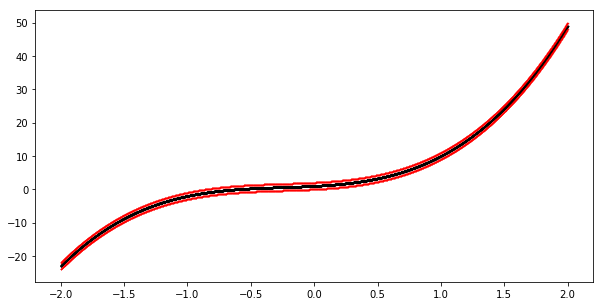

In [34]:
plt.figure(figsize=(10,5))
draw_ground_truth()

## first ten point

In [27]:
for i in np.arange(10):
    buf = Q1_b_glo(1)
    test.update(buf)


Add data point:(-0.971182, -1.465035) 

Postirior mean:
[[-0.31358465]
 [ 0.30454791]
 [-0.29577157]
 [ 0.28724815]]

Posterior variance:
[[ 0.78595412  0.20787759 -0.20188707  0.19606917]
 [ 0.20787759  0.79811293  0.19606917 -0.19041893]
 [-0.20188707  0.19606917  0.80958107  0.18493152]
 [ 0.19606917 -0.19041893  0.18493152  0.82039776]]

Add data point:(0.308353, 1.926043) 

Postirior mean:
[[ 0.60124952]
 [ 0.81525669]
 [-0.36032146]
 [ 0.48297424]]

Posterior variance:
[[ 0.43250933  0.01056603 -0.17694832  0.1204507 ]
 [ 0.01056603  0.68796319  0.2099913  -0.23263316]
 [-0.17694832  0.2099913   0.80782141  0.19026709]
 [ 0.1204507  -0.23263316  0.19026709  0.80421941]]

Add data point:(-0.229285, 1.121770) 

Postirior mean:
[[ 0.8147559 ]
 [ 0.7473708 ]
 [-0.45447554]
 [ 0.57161792]]

Posterior variance:
[[ 0.31023567  0.04944382 -0.12302691  0.06968506]
 [ 0.04944382  0.67560172  0.1928466  -0.21649186]
 [-0.12302691  0.1928466   0.78404263  0.21265421]
 [ 0.06968506 -0.216491

After 10 incomes
x, var -2.0            0
0  29.145034
x, var -1.9991998399679936            0
0  29.076383
x, var -1.998399679935987            0
0  29.007872
x, var -1.9975995199039809          0
0  28.9395
x, var -1.9967993598719744            0
0  28.871266
x, var -1.995999199839968            0
0  28.803171
x, var -1.9951990398079615            0
0  28.735215
x, var -1.994398879775955            0
0  28.667396
x, var -1.9935987197439489            0
0  28.599715
x, var -1.9927985597119424            0
0  28.532173
x, var -1.991998399679936            0
0  28.464767
x, var -1.9911982396479295            0
0  28.397499
x, var -1.990398079615923            0
0  28.330367
x, var -1.9895979195839169            0
0  28.263373
x, var -1.9887977595519104            0
0  28.196515
x, var -1.987997599519904            0
0  28.129793
x, var -1.9871974394878975            0
0  28.063208
x, var -1.9863972794558913            0
0  27.996758
x, var -1.9855971194238848            0
0  27.930444
x

x, var -1.8687737547509502            0
0  19.592832
x, var -1.8679735947189438            0
0  19.544202
x, var -1.8671734346869373            0
0  19.495678
x, var -1.866373274654931           0
0  19.44726
x, var -1.8655731146229246            0
0  19.398947
x, var -1.8647729545909182            0
0  19.350739
x, var -1.8639727945589117            0
0  19.302637
x, var -1.8631726345269053            0
0  19.254639
x, var -1.862372474494899            0
0  19.206746
x, var -1.8615723144628926            0
0  19.158958
x, var -1.8607721544308862            0
0  19.111274
x, var -1.8599719943988797            0
0  19.063694
x, var -1.8591718343668733            0
0  19.016218
x, var -1.858371674334867            0
0  18.968847
x, var -1.8575715143028606            0
0  18.921579
x, var -1.8567713542708542            0
0  18.874414
x, var -1.8559711942388477            0
0  18.827353
x, var -1.8551710342068413            0
0  18.780394
x, var -1.854370874174835            0
0  18.733539

x, var -1.7359471894378875            0
0  12.839821
x, var -1.7351470294058813            0
0  12.806425
x, var -1.7343468693738748            0
0  12.773108
x, var -1.7335467093418684            0
0  12.739869
x, var -1.732746549309862            0
0  12.706709
x, var -1.7319463892778555            0
0  12.673626
x, var -1.7311462292458493            0
0  12.640622
x, var -1.7303460692138428            0
0  12.607695
x, var -1.7295459091818364            0
0  12.574846
x, var -1.72874574914983            0
0  12.542075
x, var -1.7279455891178235           0
0  12.50938
x, var -1.7271454290858173            0
0  12.476764
x, var -1.7263452690538108            0
0  12.444224
x, var -1.7255451090218044            0
0  12.411761
x, var -1.724744948989798            0
0  12.379375
x, var -1.7239447889577915            0
0  12.347065
x, var -1.7231446289257852            0
0  12.314832
x, var -1.7223444688937788            0
0  12.282676
x, var -1.7215443088617723            0
0  12.250595

x, var -1.5975195039007801           0
0  8.113544
x, var -1.5967193438687737           0
0  8.091719
x, var -1.5959191838367675           0
0  8.069949
x, var -1.595119023804761           0
0  8.048236
x, var -1.5943188637727546           0
0  8.026578
x, var -1.593518703740748           0
0  8.004977
x, var -1.5927185437087417          0
0  7.98343
x, var -1.5919183836767354          0
0  7.96194
x, var -1.591118223644729           0
0  7.940504
x, var -1.5903180636127225           0
0  7.919124
x, var -1.589517903580716           0
0  7.897799
x, var -1.5887177435487096           0
0  7.876529
x, var -1.5879175835167034           0
0  7.855313
x, var -1.587117423484697           0
0  7.834153
x, var -1.5863172634526905           0
0  7.813047
x, var -1.585517103420684           0
0  7.791996
x, var -1.5847169433886776           0
0  7.770999
x, var -1.5839167833566714           0
0  7.750057
x, var -1.583116623324665           0
0  7.729169
x, var -1.5823164632926585           0
0  

x, var -1.467893578715743           0
0  5.233789
x, var -1.4670934186837368           0
0  5.219668
x, var -1.4662932586517303           0
0  5.205586
x, var -1.4654930986197239           0
0  5.191544
x, var -1.4646929385877177           0
0  5.177541
x, var -1.463892778555711           0
0  5.163578
x, var -1.4630926185237048           0
0  5.149654
x, var -1.4622924584916983           0
0  5.135769
x, var -1.4614922984596919           0
0  5.121923
x, var -1.4606921384276856           0
0  5.108117
x, var -1.459891978395679           0
0  5.094349
x, var -1.4590918183636727           0
0  5.080621
x, var -1.4582916583316663           0
0  5.066931
x, var -1.4574914982996598           0
0  5.053279
x, var -1.4566913382676536           0
0  5.039667
x, var -1.4558911782356472           0
0  5.026093
x, var -1.4550910182036407           0
0  5.012557
x, var -1.4542908581716343          0
0  4.99906
x, var -1.4534906981396278           0
0  4.985601
x, var -1.4526905381076216          

x, var -1.3350670134026805           0
0  3.371039
x, var -1.334266853370674           0
0  3.362397
x, var -1.3334666933386679           0
0  3.353781
x, var -1.3326665333066612           0
0  3.345193
x, var -1.331866373274655           0
0  3.336631
x, var -1.3310662132426485           0
0  3.328096
x, var -1.330266053210642           0
0  3.319588
x, var -1.3294658931786358           0
0  3.311106
x, var -1.3286657331466292          0
0  3.30265
x, var -1.327865573114623           0
0  3.294221
x, var -1.3270654130826165           0
0  3.285818
x, var -1.32626525305061           0
0  3.277442
x, var -1.3254650930186038           0
0  3.269092
x, var -1.3246649329865972           0
0  3.260768
x, var -1.323864772954591          0
0  3.25247
x, var -1.3230646129225845           0
0  3.244198
x, var -1.322264452890578           0
0  3.235952
x, var -1.3214642928585718           0
0  3.227732
x, var -1.3206641328265654           0
0  3.219538
x, var -1.319863972794559          0
0  3.2

0  2.23362
x, var -1.1974394878975794           0
0  2.228704
x, var -1.1966393278655731           0
0  2.223806
x, var -1.1958391678335667           0
0  2.218925
x, var -1.1950390078015602           0
0  2.214061
x, var -1.194238847769554           0
0  2.209214
x, var -1.1934386877375474           0
0  2.204384
x, var -1.1926385277055411           0
0  2.199571
x, var -1.1918383676735347           0
0  2.194775
x, var -1.1910382076415282           0
0  2.189996
x, var -1.190238047609522           0
0  2.185233
x, var -1.1894378875775153           0
0  2.180488
x, var -1.1886377275455091           0
0  2.175759
x, var -1.1878375675135027           0
0  2.171046
x, var -1.1870374074814962           0
0  2.166351
x, var -1.18623724744949           0
0  2.161671
x, var -1.1854370874174835           0
0  2.157009
x, var -1.184636927385477           0
0  2.152363
x, var -1.1838367673534707           0
0  2.147733
x, var -1.1830366073214642          0
0  2.14312
x, var -1.182236447289458  

x, var -1.0622124424884976           0
0  1.609628
x, var -1.0614122824564913           0
0  1.607023
x, var -1.0606121224244849           0
0  1.604429
x, var -1.0598119623924784           0
0  1.601845
x, var -1.0590118023604722           0
0  1.599271
x, var -1.0582116423284655           0
0  1.596707
x, var -1.0574114822964593           0
0  1.594154
x, var -1.0566113222644529           0
0  1.591611
x, var -1.0558111622324464           0
0  1.589078
x, var -1.0550110022004402           0
0  1.586555
x, var -1.0542108421684335           0
0  1.584043
x, var -1.0534106821364273          0
0  1.58154
x, var -1.0526105221044209           0
0  1.579048
x, var -1.0518103620724144           0
0  1.576565
x, var -1.0510102020404082           0
0  1.574093
x, var -1.0502100420084015          0
0  1.57163
x, var -1.0494098819763953           0
0  1.569178
x, var -1.0486097219443888           0
0  1.566735
x, var -1.0478095619123824           0
0  1.564302
x, var -1.0470094018803762         

0  1.300798
x, var -0.930986197239448           0
0  1.299501
x, var -0.9301860372074415          0
0  1.29821
x, var -0.9293858771754351           0
0  1.296925
x, var -0.9285857171434286           0
0  1.295646
x, var -0.9277855571114222           0
0  1.294373
x, var -0.926985397079416           0
0  1.293106
x, var -0.9261852370474095           0
0  1.291844
x, var -0.9253850770154031           0
0  1.290589
x, var -0.9245849169833966           0
0  1.289339
x, var -0.9237847569513902           0
0  1.288095
x, var -0.922984596919384           0
0  1.286856
x, var -0.9221844368873775           0
0  1.285624
x, var -0.921384276855371           0
0  1.284397
x, var -0.9205841168233646           0
0  1.283175
x, var -0.9197839567913582          0
0  1.28196
x, var -0.9189837967593519          0
0  1.28075
x, var -0.9181836367273455           0
0  1.279546
x, var -0.917383476695339           0
0  1.278347
x, var -0.9165833166633326           0
0  1.277154
x, var -0.9157831566313264    

x, var -0.7781556311262252           0
0  1.138382
x, var -0.7773554710942188           0
0  1.137888
x, var -0.7765553110622125           0
0  1.137397
x, var -0.7757551510302061           0
0  1.136908
x, var -0.7749549909981996           0
0  1.136422
x, var -0.7741548309661932           0
0  1.135938
x, var -0.7733546709341867           0
0  1.135457
x, var -0.7725545109021805           0
0  1.134979
x, var -0.7717543508701741           0
0  1.134503
x, var -0.7709541908381676          0
0  1.13403
x, var -0.7701540308061612          0
0  1.13356
x, var -0.7693538707741547           0
0  1.133092
x, var -0.7685537107421485           0
0  1.132627
x, var -0.7677535507101421           0
0  1.132164
x, var -0.7669533906781356           0
0  1.131704
x, var -0.7661532306461292           0
0  1.131247
x, var -0.7653530706141227           0
0  1.130792
x, var -0.7645529105821165           0
0  1.130339
x, var -0.76375275055011           0
0  1.129889
x, var -0.7629525905181036           

x, var -0.6341268253650729           0
0  1.082762
x, var -0.6333266653330667           0
0  1.082591
x, var -0.6325265053010602          0
0  1.08242
x, var -0.6317263452690538           0
0  1.082251
x, var -0.6309261852370474           0
0  1.082083
x, var -0.6301260252050409           0
0  1.081916
x, var -0.6293258651730347           0
0  1.081751
x, var -0.6285257051410282           0
0  1.081586
x, var -0.6277255451090218           0
0  1.081422
x, var -0.6269253850770153           0
0  1.081259
x, var -0.6261252250450089           0
0  1.081097
x, var -0.6253250650130027           0
0  1.080936
x, var -0.6245249049809962           0
0  1.080776
x, var -0.6237247449489898           0
0  1.080617
x, var -0.6229245849169833          0
0  1.08046
x, var -0.6221244248849771           0
0  1.080303
x, var -0.6213242648529707           0
0  1.080147
x, var -0.6205241048209642           0
0  1.079992
x, var -0.6197239447889578           0
0  1.079838
x, var -0.6189237847569513         

x, var -0.47729545909181836           0
0  1.063112
x, var -0.4764952990598119           0
0  1.063057
x, var -0.47569513902780547           0
0  1.063002
x, var -0.47489497899579924           0
0  1.062948
x, var -0.4740948189637928           0
0  1.062894
x, var -0.47329465893178635          0
0  1.06284
x, var -0.4724944988997799           0
0  1.062787
x, var -0.47169433886777345           0
0  1.062733
x, var -0.47089417883576723          0
0  1.06268
x, var -0.4700940188037608           0
0  1.062628
x, var -0.46929385877175434           0
0  1.062575
x, var -0.4684936987397479           0
0  1.062523
x, var -0.46769353870774144           0
0  1.062471
x, var -0.4668933786757352           0
0  1.062419
x, var -0.46609321864372877           0
0  1.062367
x, var -0.4652930586117223           0
0  1.062316
x, var -0.4644928985797159           0
0  1.062264
x, var -0.46369273854770965           0
0  1.062214
x, var -0.4628925785157032           0
0  1.062163
x, var -0.462092418483696

0  1.055466
x, var -0.32526505301060205           0
0  1.055433
x, var -0.3244648929785958         0
0  1.0554
x, var -0.3236647329465894           0
0  1.055367
x, var -0.3228645729145829           0
0  1.055335
x, var -0.3220644128825765           0
0  1.055302
x, var -0.32126425285057003           0
0  1.055269
x, var -0.3204640928185638           0
0  1.055237
x, var -0.31966393278655736           0
0  1.055204
x, var -0.3188637727545509           0
0  1.055172
x, var -0.31806361272254446           0
0  1.055139
x, var -0.317263452690538           0
0  1.055107
x, var -0.3164632926585318           0
0  1.055074
x, var -0.31566313262652534           0
0  1.055042
x, var -0.3148629725945189           0
0  1.055009
x, var -0.31406281256251245           0
0  1.054977
x, var -0.313262652530506           0
0  1.054945
x, var -0.3124624924984998           0
0  1.054912
x, var -0.31166233246649333          0
0  1.05488
x, var -0.3108621724344869           0
0  1.054848
x, var -0.3100620124

0  1.049809
x, var -0.17483496699339862           0
0  1.049782
x, var -0.17403480696139217           0
0  1.049756
x, var -0.17323464692938595           0
0  1.049729
x, var -0.1724344868973795           0
0  1.049702
x, var -0.17163432686537305           0
0  1.049675
x, var -0.1708341668333666           0
0  1.049648
x, var -0.17003400680136016           0
0  1.049622
x, var -0.16923384676935394           0
0  1.049595
x, var -0.1684336867373475           0
0  1.049569
x, var -0.16763352670534104           0
0  1.049542
x, var -0.1668333666733346           0
0  1.049516
x, var -0.16603320664132837           0
0  1.049489
x, var -0.16523304660932192           0
0  1.049463
x, var -0.16443288657731547           0
0  1.049436
x, var -0.16363272654530903          0
0  1.04941
x, var -0.16283256651330258           0
0  1.049384
x, var -0.16203240648129635           0
0  1.049358
x, var -0.1612322464492899           0
0  1.049332
x, var -0.16043208641728346           0
0  1.049305
x, var 

x, var -0.01880376075215051           0
0  1.045694
x, var -0.018003600720144064           0
0  1.045681
x, var -0.017203440688137617           0
0  1.045667
x, var -0.01640328065613117           0
0  1.045654
x, var -0.015603120624124722          0
0  1.04564
x, var -0.014802960592118497           0
0  1.045627
x, var -0.01400280056011205           0
0  1.045614
x, var -0.013202640528105603           0
0  1.045601
x, var -0.012402480496099155           0
0  1.045588
x, var -0.011602320464092708           0
0  1.045575
x, var -0.010802160432086483           0
0  1.045562
x, var -0.010002000400080036           0
0  1.045549
x, var -0.009201840368073588           0
0  1.045536
x, var -0.008401680336067141           0
0  1.045524
x, var -0.007601520304060916           0
0  1.045511
x, var -0.006801360272054469           0
0  1.045499
x, var -0.006001200240048021           0
0  1.045486
x, var -0.005201040208041574           0
0  1.045474
x, var -0.004400880176035127           0
0  1.04546

x, var 0.11242248449689951           0
0  1.044558
x, var 0.11322264452890574           0
0  1.044557
x, var 0.1140228045609124           0
0  1.044556
x, var 0.11482296459291863           0
0  1.044556
x, var 0.11562312462492486           0
0  1.044555
x, var 0.11642328465693152           0
0  1.044555
x, var 0.11722344468893775           0
0  1.044555
x, var 0.11802360472094398           0
0  1.044554
x, var 0.11882376475295064           0
0  1.044554
x, var 0.11962392478495687           0
0  1.044554
x, var 0.12042408481696354           0
0  1.044554
x, var 0.12122424484896976           0
0  1.044554
x, var 0.12202440488097599           0
0  1.044554
x, var 0.12282456491298266           0
0  1.044554
x, var 0.12362472494498888           0
0  1.044554
x, var 0.12442488497699555           0
0  1.044554
x, var 0.12522504500900178           0
0  1.044554
x, var 0.126025205041008           0
0  1.044555
x, var 0.12682536507301467           0
0  1.044555
x, var 0.1276255251050209         

x, var 0.2668533706741347           0
0  1.045188
x, var 0.2676535307061414           0
0  1.045193
x, var 0.2684536907381476           0
0  1.045198
x, var 0.26925385077015385           0
0  1.045203
x, var 0.2700540108021605           0
0  1.045207
x, var 0.27085417083416674           0
0  1.045212
x, var 0.2716543308661734           0
0  1.045217
x, var 0.27245449089817964           0
0  1.045222
x, var 0.27325465093018586           0
0  1.045226
x, var 0.27405481096219253           0
0  1.045231
x, var 0.27485497099419876           0
0  1.045236
x, var 0.2756551310262054          0
0  1.04524
x, var 0.27645529105821165           0
0  1.045245
x, var 0.2772554510902179           0
0  1.045249
x, var 0.27805561112222454           0
0  1.045254
x, var 0.27885577115423077           0
0  1.045259
x, var 0.27965593118623744           0
0  1.045263
x, var 0.28045609121824366           0
0  1.045268
x, var 0.2812562512502499           0
0  1.045272
x, var 0.28205641128225656           0
0 

x, var 0.4268853770754153          0
0  1.04558
x, var 0.4276855371074215           0
0  1.045578
x, var 0.42848569713942775           0
0  1.045577
x, var 0.4292858571714344           0
0  1.045575
x, var 0.43008601720344064           0
0  1.045574
x, var 0.4308861772354473           0
0  1.045573
x, var 0.43168633726745353           0
0  1.045571
x, var 0.43248649729945976          0
0  1.04557
x, var 0.43328665733146643           0
0  1.045568
x, var 0.43408681736347265           0
0  1.045567
x, var 0.4348869773954793           0
0  1.045565
x, var 0.43568713742748555           0
0  1.045563
x, var 0.4364872974594918           0
0  1.045562
x, var 0.43728745749149844          0
0  1.04556
x, var 0.43808761752350467           0
0  1.045559
x, var 0.4388877775555109           0
0  1.045557
x, var 0.43968793758751756           0
0  1.045555
x, var 0.4404880976195238           0
0  1.045554
x, var 0.44128825765153046           0
0  1.045552
x, var 0.4420884176835367           0
0  1.04

x, var 0.5749149829965994           0
0  1.045962
x, var 0.5757151430286056           0
0  1.045976
x, var 0.5765153030606123          0
0  1.04599
x, var 0.5773154630926185           0
0  1.046005
x, var 0.5781156231246247          0
0  1.04602
x, var 0.5789157831566314           0
0  1.046035
x, var 0.5797159431886376          0
0  1.04605
x, var 0.5805161032206443           0
0  1.046066
x, var 0.5813162632526505           0
0  1.046082
x, var 0.5821164232846567           0
0  1.046098
x, var 0.5829165833166634           0
0  1.046114
x, var 0.5837167433486696           0
0  1.046131
x, var 0.5845169033806763           0
0  1.046148
x, var 0.5853170634126825           0
0  1.046165
x, var 0.5861172234446888           0
0  1.046183
x, var 0.5869173834766954           0
0  1.046201
x, var 0.5877175435087016           0
0  1.046219
x, var 0.5885177035407083           0
0  1.046238
x, var 0.5893178635727145           0
0  1.046257
x, var 0.5901180236047208           0
0  1.046276
x, var

x, var 0.7333466693338666           0
0  1.058599
x, var 0.7341468293658733           0
0  1.058745
x, var 0.7349469893978795           0
0  1.058893
x, var 0.7357471494298862           0
0  1.059041
x, var 0.7365473094618924           0
0  1.059191
x, var 0.7373474694938986           0
0  1.059342
x, var 0.7381476295259053           0
0  1.059494
x, var 0.7389477895579115           0
0  1.059648
x, var 0.7397479495899182           0
0  1.059802
x, var 0.7405481096219244           0
0  1.059959
x, var 0.7413482696539306           0
0  1.060116
x, var 0.7421484296859373           0
0  1.060275
x, var 0.7429485897179435           0
0  1.060435
x, var 0.7437487497499502           0
0  1.060596
x, var 0.7445489097819564           0
0  1.060758
x, var 0.7453490698139627           0
0  1.060922
x, var 0.7461492298459693           0
0  1.061088
x, var 0.7469493898779755           0
0  1.061254
x, var 0.7477495499099822           0
0  1.061422
x, var 0.7485497099419884           0
0  1.061592


x, var 0.8957791558311663           0
0  1.126041
x, var 0.8965793158631725           0
0  1.126637
x, var 0.8973794758951792           0
0  1.127236
x, var 0.8981796359271854           0
0  1.127839
x, var 0.8989797959591916           0
0  1.128446
x, var 0.8997799559911983           0
0  1.129056
x, var 0.9005801160232045           0
0  1.129669
x, var 0.9013802760552112           0
0  1.130287
x, var 0.9021804360872174           0
0  1.130907
x, var 0.9029805961192237           0
0  1.131532
x, var 0.9037807561512303           0
0  1.132159
x, var 0.9045809161832365           0
0  1.132791
x, var 0.9053810762152432           0
0  1.133426
x, var 0.9061812362472494           0
0  1.134065
x, var 0.9069813962792557           0
0  1.134707
x, var 0.9077815563112623           0
0  1.135353
x, var 0.9085817163432686           0
0  1.136003
x, var 0.9093818763752752           0
0  1.136657
x, var 0.9101820364072815           0
0  1.137314
x, var 0.9109821964392877           0
0  1.137975


x, var 1.0590118023604722           0
0  1.344441
x, var 1.0598119623924784           0
0  1.346135
x, var 1.060612122424485           0
0  1.347836
x, var 1.0614122824564913           0
0  1.349544
x, var 1.0622124424884976           0
0  1.351261
x, var 1.0630126025205042           0
0  1.352985
x, var 1.0638127625525104           0
0  1.354717
x, var 1.0646129225845171           0
0  1.356457
x, var 1.0654130826165233           0
0  1.358205
x, var 1.0662132426485296          0
0  1.35996
x, var 1.0670134026805362           0
0  1.361724
x, var 1.0678135627125425           0
0  1.363496
x, var 1.0686137227445491           0
0  1.365275
x, var 1.0694138827765554           0
0  1.367062
x, var 1.0702140428085616           0
0  1.368858
x, var 1.0710142028405683           0
0  1.370662
x, var 1.0718143628725745           0
0  1.372473
x, var 1.0726145229045807           0
0  1.374293
x, var 1.0734146829365874           0
0  1.376121
x, var 1.0742148429685936           0
0  1.377957
x, 

x, var 1.191838367673535           0
0  1.753223
x, var 1.1926385277055411           0
0  1.756616
x, var 1.1934386877375474           0
0  1.760022
x, var 1.194238847769554           0
0  1.763441
x, var 1.1950390078015602           0
0  1.766874
x, var 1.195839167833567           0
0  1.770319
x, var 1.1966393278655731           0
0  1.773778
x, var 1.1974394878975794           0
0  1.777251
x, var 1.198239647929586           0
0  1.780737
x, var 1.1990398079615923           0
0  1.784236
x, var 1.199839967993599           0
0  1.787749
x, var 1.2006401280256052           0
0  1.791275
x, var 1.2014402880576114           0
0  1.794815
x, var 1.202240448089618           0
0  1.798369
x, var 1.2030406081216243           0
0  1.801936
x, var 1.203840768153631           0
0  1.805517
x, var 1.2046409281856372           0
0  1.809111
x, var 1.2054410882176434           0
0  1.812719
x, var 1.20624124824965           0
0  1.816342
x, var 1.2070414082816563           0
0  1.819978
x, var 1.

x, var 1.3270654130826167           0
0  2.547805
x, var 1.327865573114623           0
0  2.554058
x, var 1.3286657331466292           0
0  2.560332
x, var 1.3294658931786358           0
0  2.566628
x, var 1.330266053210642           0
0  2.572945
x, var 1.3310662132426487           0
0  2.579283
x, var 1.331866373274655           0
0  2.585642
x, var 1.3326665333066612           0
0  2.592023
x, var 1.3334666933386679           0
0  2.598425
x, var 1.334266853370674          0
0  2.60485
x, var 1.3350670134026807           0
0  2.611295
x, var 1.335867173434687           0
0  2.617763
x, var 1.3366673334666932           0
0  2.624252
x, var 1.3374674934986999           0
0  2.630763
x, var 1.338267653530706           0
0  2.637296
x, var 1.3390678135627128          0
0  2.64385
x, var 1.339867973594719           0
0  2.650427
x, var 1.3406681336267252           0
0  2.657026
x, var 1.3414682936587319           0
0  2.663647
x, var 1.342268453690738          0
0  2.67029
x, var 1.34306

x, var 1.4622924584916985           0
0  3.953418
x, var 1.4630926185237048           0
0  3.964139
x, var 1.463892778555711           0
0  3.974892
x, var 1.4646929385877177           0
0  3.985678
x, var 1.4654930986197239           0
0  3.996496
x, var 1.4662932586517305           0
0  4.007346
x, var 1.4670934186837368          0
0  4.01823
x, var 1.467893578715743           0
0  4.029146
x, var 1.4686937387477497           0
0  4.040094
x, var 1.469493898779756           0
0  4.051076
x, var 1.4702940588117626          0
0  4.06209
x, var 1.4710942188437688           0
0  4.073138
x, var 1.471894378875775           0
0  4.084218
x, var 1.4726945389077817           0
0  4.095332
x, var 1.473494698939788           0
0  4.106479
x, var 1.4742948589717946           0
0  4.117659
x, var 1.4750950190038008           0
0  4.128873
x, var 1.475895179035807          0
0  4.14012
x, var 1.4766953390678137           0
0  4.151401
x, var 1.47749549909982           0
0  4.162716
x, var 1.47829

x, var 1.6119223844768955          0
0  6.60912
x, var 1.6127225445089017           0
0  6.627364
x, var 1.6135227045409084           0
0  6.645658
x, var 1.6143228645729146           0
0  6.664001
x, var 1.6151230246049209           0
0  6.682392
x, var 1.6159231846369275           0
0  6.700834
x, var 1.6167233446689337           0
0  6.719325
x, var 1.6175235047009404           0
0  6.737865
x, var 1.6183236647329466           0
0  6.756455
x, var 1.6191238247649529           0
0  6.775095
x, var 1.6199239847969595           0
0  6.793785
x, var 1.6207241448289658           0
0  6.812525
x, var 1.621524304860972           0
0  6.831315
x, var 1.6223244648929787           0
0  6.850156
x, var 1.6231246249249849           0
0  6.869046
x, var 1.6239247849569916           0
0  6.887988
x, var 1.6247249449889978           0
0  6.906979
x, var 1.625525105021004           0
0  6.926022
x, var 1.6263252650530107           0
0  6.945115
x, var 1.627125425085017           0
0  6.964259
x, va

x, var 1.7671534306861374            0
0  11.201872
x, var 1.7679535907181436            0
0  11.231792
x, var 1.7687537507501498            0
0  11.261784
x, var 1.7695539107821565           0
0  11.29185
x, var 1.7703540708141627            0
0  11.321988
x, var 1.7711542308461694            0
0  11.352199
x, var 1.7719543908781756            0
0  11.382482
x, var 1.7727545509101819           0
0  11.41284
x, var 1.7735547109421885           0
0  11.44327
x, var 1.7743548709741948            0
0  11.473774
x, var 1.7751550310062014            0
0  11.504352
x, var 1.7759551910382076            0
0  11.535003
x, var 1.7767553510702139            0
0  11.565729
x, var 1.7775555111022205            0
0  11.596528
x, var 1.7783556711342268            0
0  11.627402
x, var 1.7791558311662334           0
0  11.65835
x, var 1.7799559911982397            0
0  11.689372
x, var 1.7807561512302459            0
0  11.720469
x, var 1.7815563112622526            0
0  11.751641
x, var 1.78235647129

x, var 1.8991798359671934           0
0  17.22791
x, var 1.8999799959991996            0
0  17.271824
x, var 1.9007801560312063            0
0  17.315835
x, var 1.9015803160632125            0
0  17.359945
x, var 1.9023804760952192            0
0  17.404154
x, var 1.9031806361272254            0
0  17.448461
x, var 1.9039807961592317            0
0  17.492868
x, var 1.9047809561912383            0
0  17.537373
x, var 1.9055811162232446            0
0  17.581978
x, var 1.9063812762552512            0
0  17.626682
x, var 1.9071814362872574            0
0  17.671485
x, var 1.9079815963192637            0
0  17.716389
x, var 1.9087817563512703            0
0  17.761392
x, var 1.9095819163832766            0
0  17.806496
x, var 1.9103820764152832          0
0  17.8517
x, var 1.9111822364472895            0
0  17.897004
x, var 1.9119823964792957            0
0  17.942409
x, var 1.9127825565113024            0
0  17.987915
x, var 1.9135827165433086            0
0  18.033522
x, var 1.914382876

x, var -1.9663932786557312           0
0  26.37904
x, var -1.9655931186237248            0
0  26.316047
x, var -1.9647929585917183            0
0  26.253184
x, var -1.9639927985597119           0
0  26.19045
x, var -1.9631926385277056            0
0  26.127846
x, var -1.9623924784956992            0
0  26.065372
x, var -1.9615923184636928            0
0  26.003027
x, var -1.9607921584316863            0
0  25.940811
x, var -1.9599919983996799            0
0  25.878723
x, var -1.9591918383676736            0
0  25.816764
x, var -1.9583916783356672            0
0  25.754933
x, var -1.9575915183036607            0
0  25.693231
x, var -1.9567913582716543            0
0  25.631656
x, var -1.9559911982396478            0
0  25.570209
x, var -1.9551910382076416           0
0  25.50889
x, var -1.9543908781756352            0
0  25.447698
x, var -1.9535907181436287            0
0  25.386633
x, var -1.9527905581116223            0
0  25.325694
x, var -1.9519903980796158            0
0  25.264883

x, var -1.8335667133426685            0
0  17.550856
x, var -1.832766553310662            0
0  17.506714
x, var -1.8319663932786558            0
0  17.462669
x, var -1.8311662332466494            0
0  17.418723
x, var -1.830366073214643            0
0  17.374874
x, var -1.8295659131826365            0
0  17.331122
x, var -1.82876575315063            0
0  17.287468
x, var -1.8279655931186238            0
0  17.243911
x, var -1.8271654330866174            0
0  17.200451
x, var -1.826365273054611            0
0  17.157087
x, var -1.8255651130226045            0
0  17.113821
x, var -1.824764952990598            0
0  17.070651
x, var -1.8239647929585918            0
0  17.027577
x, var -1.8231646329265854            0
0  16.984599
x, var -1.822364472894579            0
0  16.941717
x, var -1.8215643128625725            0
0  16.898931
x, var -1.820764152830566            0
0  16.856241
x, var -1.8199639927985598            0
0  16.813646
x, var -1.8191638327665534            0
0  16.771146
x

x, var -1.7023404680936187           0
0  11.50316
x, var -1.7015403080616123            0
0  11.472939
x, var -1.700740148029606            0
0  11.442791
x, var -1.6999399879975996            0
0  11.412714
x, var -1.6991398279655932           0
0  11.38271
x, var -1.6983396679335867            0
0  11.352779
x, var -1.6975395079015803            0
0  11.322919
x, var -1.696739347869574            0
0  11.293131
x, var -1.6959391878375676            0
0  11.263415
x, var -1.6951390278055611           0
0  11.23377
x, var -1.6943388677735547            0
0  11.204197
x, var -1.6935387077415482            0
0  11.174695
x, var -1.692738547709542            0
0  11.145264
x, var -1.6919383876775356            0
0  11.115905
x, var -1.6911382276455291            0
0  11.086616
x, var -1.6903380676135227            0
0  11.057398
x, var -1.6895379075815162            0
0  11.028251
x, var -1.68873774754951            0
0  10.999174
x, var -1.6879375875175036            0
0  10.970167
x, v

x, var -1.5727145429085816           0
0  7.462507
x, var -1.5719143828765754           0
0  7.442367
x, var -1.571114222844569           0
0  7.422279
x, var -1.5703140628125625           0
0  7.402243
x, var -1.5695139027805562          0
0  7.38226
x, var -1.5687137427485496           0
0  7.362329
x, var -1.5679135827165434          0
0  7.34245
x, var -1.567113422684537           0
0  7.322623
x, var -1.5663132626525305           0
0  7.302848
x, var -1.5655131026205242           0
0  7.283125
x, var -1.5647129425885176           0
0  7.263454
x, var -1.5639127825565113           0
0  7.243834
x, var -1.563112622524505           0
0  7.224266
x, var -1.5623124624924984           0
0  7.204749
x, var -1.5615123024604922           0
0  7.185284
x, var -1.5607121424284858           0
0  7.165869
x, var -1.5599119823964793           0
0  7.146506
x, var -1.5591118223644729           0
0  7.127193
x, var -1.5583116623324664           0
0  7.107932
x, var -1.5575115023004602           0

x, var -1.4398879775955191           0
0  4.762571
x, var -1.4390878175635127           0
0  4.749787
x, var -1.4382876575315064           0
0  4.737039
x, var -1.4374874974994998           0
0  4.724328
x, var -1.4366873374674936           0
0  4.711653
x, var -1.435887177435487           0
0  4.699014
x, var -1.4350870174034807           0
0  4.686412
x, var -1.4342868573714744           0
0  4.673846
x, var -1.4334866973394678           0
0  4.661316
x, var -1.4326865373074615           0
0  4.648823
x, var -1.431886377275455           0
0  4.636365
x, var -1.4310862172434486           0
0  4.623943
x, var -1.4302860572114424           0
0  4.611558
x, var -1.4294858971794357           0
0  4.599207
x, var -1.4286857371474295           0
0  4.586893
x, var -1.427885577115423           0
0  4.574614
x, var -1.4270854170834166           0
0  4.562371
x, var -1.4262852570514104           0
0  4.550163
x, var -1.4254850970194037          0
0  4.53799
x, var -1.4246849369873975          

x, var -1.3078615723144629           0
0  3.091892
x, var -1.3070614122824566           0
0  3.084127
x, var -1.30626125225045           0
0  3.076387
x, var -1.3054610922184438           0
0  3.068672
x, var -1.3046609321864373           0
0  3.060981
x, var -1.3038607721544309           0
0  3.053314
x, var -1.3030606121224246           0
0  3.045672
x, var -1.302260452090418           0
0  3.038055
x, var -1.3014602920584117           0
0  3.030462
x, var -1.3006601320264053           0
0  3.022893
x, var -1.2998599719943988           0
0  3.015348
x, var -1.2990598119623926           0
0  3.007827
x, var -1.298259651930386           0
0  3.000331
x, var -1.2974594918983797           0
0  2.992858
x, var -1.2966593318663733           0
0  2.985409
x, var -1.2958591718343668           0
0  2.977985
x, var -1.2950590118023606           0
0  2.970584
x, var -1.294258851770354           0
0  2.963207
x, var -1.2934586917383477           0
0  2.955853
x, var -1.2926585317063413          

x, var -1.174234846969394           0
0  2.093442
x, var -1.1734346869373875           0
0  2.089021
x, var -1.172634526905381           0
0  2.084617
x, var -1.1718343668733748           0
0  2.080228
x, var -1.1710342068413682           0
0  2.075855
x, var -1.170234046809362           0
0  2.071498
x, var -1.1694338867773555           0
0  2.067156
x, var -1.168633726745349          0
0  2.06283
x, var -1.1678335667133428          0
0  2.05852
x, var -1.1670334066813361           0
0  2.054225
x, var -1.16623324664933           0
0  2.049945
x, var -1.1654330866173235           0
0  2.045681
x, var -1.164632926585317           0
0  2.041432
x, var -1.1638327665533108           0
0  2.037198
x, var -1.1630326065213041          0
0  2.03298
x, var -1.162232446489298           0
0  2.028776
x, var -1.1614322864572915           0
0  2.024589
x, var -1.160632126425285           0
0  2.020416
x, var -1.1598319663932788           0
0  2.016258
x, var -1.1590318063612721           0
0  2.01

x, var -1.0438087617523504           0
0  1.552284
x, var -1.0430086017203442          0
0  1.54991
x, var -1.0422084416883377           0
0  1.547545
x, var -1.0414082816563313          0
0  1.54519
x, var -1.0406081216243248           0
0  1.542845
x, var -1.0398079615923184           0
0  1.540509
x, var -1.0390078015603121           0
0  1.538182
x, var -1.0382076415283057           0
0  1.535865
x, var -1.0374074814962992           0
0  1.533558
x, var -1.036607321464293          0
0  1.53126
x, var -1.0358071614322863           0
0  1.528971
x, var -1.0350070014002801           0
0  1.526692
x, var -1.0342068413682737           0
0  1.524422
x, var -1.0334066813362672           0
0  1.522161
x, var -1.032606521304261           0
0  1.519909
x, var -1.0318063612722543           0
0  1.517667
x, var -1.031006201240248           0
0  1.515434
x, var -1.0302060412082417          0
0  1.51321
x, var -1.0294058811762352           0
0  1.510996
x, var -1.028605721144229          0
0  1.

x, var -0.9109821964392879           0
0  1.268956
x, var -0.9101820364072815           0
0  1.267807
x, var -0.909381876375275           0
0  1.266663
x, var -0.9085817163432686           0
0  1.265525
x, var -0.9077815563112623           0
0  1.264391
x, var -0.9069813962792559           0
0  1.263264
x, var -0.9061812362472494           0
0  1.262141
x, var -0.905381076215243           0
0  1.261024
x, var -0.9045809161832365           0
0  1.259912
x, var -0.9037807561512303           0
0  1.258805
x, var -0.9029805961192239           0
0  1.257704
x, var -0.9021804360872174           0
0  1.256608
x, var -0.901380276055211           0
0  1.255517
x, var -0.9005801160232045           0
0  1.254431
x, var -0.8997799559911983          0
0  1.25335
x, var -0.8989797959591919           0
0  1.252274
x, var -0.8981796359271854           0
0  1.251204
x, var -0.897379475895179           0
0  1.250139
x, var -0.8965793158631725           0
0  1.249078
x, var -0.8957791558311663           

x, var -0.7813562712542508           0
0  1.140387
x, var -0.7805561112222446           0
0  1.139882
x, var -0.7797559511902381           0
0  1.139379
x, var -0.7789557911582317           0
0  1.138879
x, var -0.7781556311262252           0
0  1.138382
x, var -0.7773554710942188           0
0  1.137888
x, var -0.7765553110622125           0
0  1.137397
x, var -0.7757551510302061           0
0  1.136908
x, var -0.7749549909981996           0
0  1.136422
x, var -0.7741548309661932           0
0  1.135938
x, var -0.7733546709341867           0
0  1.135457
x, var -0.7725545109021805           0
0  1.134979
x, var -0.7717543508701741           0
0  1.134503
x, var -0.7709541908381676          0
0  1.13403
x, var -0.7701540308061612          0
0  1.13356
x, var -0.7693538707741547           0
0  1.133092
x, var -0.7685537107421485           0
0  1.132627
x, var -0.7677535507101421           0
0  1.132164
x, var -0.7669533906781356           0
0  1.131704
x, var -0.7661532306461292         

x, var -0.6181236247249451           0
0  1.079533
x, var -0.6173234646929386           0
0  1.079382
x, var -0.6165233046609322           0
0  1.079231
x, var -0.6157231446289257           0
0  1.079082
x, var -0.6149229845969193           0
0  1.078934
x, var -0.6141228245649131           0
0  1.078786
x, var -0.6133226645329066          0
0  1.07864
x, var -0.6125225045009002           0
0  1.078494
x, var -0.6117223444688937           0
0  1.078349
x, var -0.6109221844368873           0
0  1.078206
x, var -0.6101220244048811           0
0  1.078063
x, var -0.6093218643728746           0
0  1.077921
x, var -0.6085217043408682          0
0  1.07778
x, var -0.6077215443088617           0
0  1.077639
x, var -0.6069213842768553         0
0  1.0775
x, var -0.606121224244849           0
0  1.077361
x, var -0.6053210642128426           0
0  1.077224
x, var -0.6045209041808361           0
0  1.077087
x, var -0.6037207441488297           0
0  1.076951
x, var -0.6029205841168233           0
0

0  1.063674
x, var -0.48449689937987594           0
0  1.063617
x, var -0.4836967393478695           0
0  1.063559
x, var -0.4828965793158633           0
0  1.063502
x, var -0.4820964192838568           0
0  1.063446
x, var -0.4812962592518504           0
0  1.063389
x, var -0.48049609921984393           0
0  1.063333
x, var -0.4796959391878375           0
0  1.063277
x, var -0.47889577915583126           0
0  1.063222
x, var -0.4780956191238248           0
0  1.063167
x, var -0.47729545909181836           0
0  1.063112
x, var -0.4764952990598119           0
0  1.063057
x, var -0.47569513902780547           0
0  1.063002
x, var -0.47489497899579924           0
0  1.062948
x, var -0.4740948189637928           0
0  1.062894
x, var -0.47329465893178635          0
0  1.06284
x, var -0.4724944988997799           0
0  1.062787
x, var -0.47169433886777345           0
0  1.062733
x, var -0.47089417883576723          0
0  1.06268
x, var -0.4700940188037608           0
0  1.062628
x, var -0.4692

x, var -0.3340668133626725           0
0  1.055796
x, var -0.3332666533306661           0
0  1.055763
x, var -0.3324664932986596          0
0  1.05573
x, var -0.3316663332666534           0
0  1.055696
x, var -0.33086617323464695           0
0  1.055663
x, var -0.3300660132026405          0
0  1.05563
x, var -0.32926585317063406           0
0  1.055597
x, var -0.3284656931386276           0
0  1.055564
x, var -0.3276655331066214           0
0  1.055531
x, var -0.32686537307461494           0
0  1.055499
x, var -0.3260652130426085           0
0  1.055466
x, var -0.32526505301060205           0
0  1.055433
x, var -0.3244648929785958         0
0  1.0554
x, var -0.3236647329465894           0
0  1.055367
x, var -0.3228645729145829           0
0  1.055335
x, var -0.3220644128825765           0
0  1.055302
x, var -0.32126425285057003           0
0  1.055269
x, var -0.3204640928185638           0
0  1.055237
x, var -0.31966393278655736           0
0  1.055204
x, var -0.3188637727545509       

x, var -0.17643528705741152           0
0  1.049836
x, var -0.17563512702540507           0
0  1.049809
x, var -0.17483496699339862           0
0  1.049782
x, var -0.17403480696139217           0
0  1.049756
x, var -0.17323464692938595           0
0  1.049729
x, var -0.1724344868973795           0
0  1.049702
x, var -0.17163432686537305           0
0  1.049675
x, var -0.1708341668333666           0
0  1.049648
x, var -0.17003400680136016           0
0  1.049622
x, var -0.16923384676935394           0
0  1.049595
x, var -0.1684336867373475           0
0  1.049569
x, var -0.16763352670534104           0
0  1.049542
x, var -0.1668333666733346           0
0  1.049516
x, var -0.16603320664132837           0
0  1.049489
x, var -0.16523304660932192           0
0  1.049463
x, var -0.16443288657731547           0
0  1.049436
x, var -0.16363272654530903          0
0  1.04941
x, var -0.16283256651330258           0
0  1.049384
x, var -0.16203240648129635           0
0  1.049358
x, var -0.16123224

0  1.046274
x, var -0.04840968193638728           0
0  1.046258
x, var -0.047609521904380836           0
0  1.046241
x, var -0.04680936187237439           0
0  1.046224
x, var -0.046009201840368164           0
0  1.046208
x, var -0.045209041808361716           0
0  1.046191
x, var -0.04440888177635527           0
0  1.046175
x, var -0.04360872174434882           0
0  1.046159
x, var -0.042808561712342375           0
0  1.046142
x, var -0.04200840168033615           0
0  1.046126
x, var -0.0412082416483297          0
0  1.04611
x, var -0.040408081616323255           0
0  1.046094
x, var -0.03960792158431681           0
0  1.046078
x, var -0.03880776155231036           0
0  1.046062
x, var -0.038007601520304135           0
0  1.046047
x, var -0.03720744148829769           0
0  1.046031
x, var -0.03640728145629124           0
0  1.046016
x, var -0.03560712142428479        0
0  1.046
x, var -0.034806961392278346           0
0  1.045985
x, var -0.03400680136027212           0
0  1.045969
x,

x, var 0.08201640328065629           0
0  1.044634
x, var 0.08281656331266252           0
0  1.044631
x, var 0.08361672334466874           0
0  1.044627
x, var 0.08441688337667541           0
0  1.044624
x, var 0.08521704340868164           0
0  1.044621
x, var 0.0860172034406883           0
0  1.044618
x, var 0.08681736347269453           0
0  1.044615
x, var 0.08761752350470076           0
0  1.044612
x, var 0.08841768353670743           0
0  1.044609
x, var 0.08921784356871365           0
0  1.044607
x, var 0.09001800360072032           0
0  1.044604
x, var 0.09081816363272655           0
0  1.044601
x, var 0.09161832366473277           0
0  1.044599
x, var 0.09241848369673944           0
0  1.044596
x, var 0.09321864372874566           0
0  1.044594
x, var 0.09401880376075233           0
0  1.044592
x, var 0.09481896379275856          0
0  1.04459
x, var 0.09561912382476478           0
0  1.044587
x, var 0.09641928385677145           0
0  1.044585
x, var 0.09721944388877768        

x, var 0.23724744948989818           0
0  1.045008
x, var 0.2380476095219044           0
0  1.045013
x, var 0.23884776955391063           0
0  1.045018
x, var 0.2396479295859173           0
0  1.045023
x, var 0.24044808961792352           0
0  1.045027
x, var 0.2412482496499302           0
0  1.045032
x, var 0.24204840968193642           0
0  1.045037
x, var 0.24284856971394264           0
0  1.045042
x, var 0.2436487297459493           0
0  1.045047
x, var 0.24444888977795554           0
0  1.045052
x, var 0.2452490498099622           0
0  1.045057
x, var 0.24604920984196843           0
0  1.045062
x, var 0.24684936987397466           0
0  1.045067
x, var 0.24764952990598132           0
0  1.045072
x, var 0.24844968993798755           0
0  1.045077
x, var 0.24924984996999422           0
0  1.045082
x, var 0.25005001000200044           0
0  1.045086
x, var 0.25085017003400667           0
0  1.045091
x, var 0.25165033006601334           0
0  1.045096
x, var 0.25245049009801956          

x, var 0.38287657531506314           0
0  1.045611
x, var 0.38367673534706936           0
0  1.045611
x, var 0.38447689537907603           0
0  1.045612
x, var 0.38527705541108226           0
0  1.045612
x, var 0.3860772154430885           0
0  1.045612
x, var 0.38687737547509515           0
0  1.045612
x, var 0.3876775355071014           0
0  1.045613
x, var 0.38847769553910805           0
0  1.045613
x, var 0.3892778555711143           0
0  1.045613
x, var 0.3900780156031205           0
0  1.045613
x, var 0.39087817563512717           0
0  1.045613
x, var 0.3916783356671334           0
0  1.045613
x, var 0.3924784956991396           0
0  1.045613
x, var 0.3932786557311463           0
0  1.045613
x, var 0.3940788157631525           0
0  1.045612
x, var 0.3948789757951592           0
0  1.045612
x, var 0.3956791358271654           0
0  1.045612
x, var 0.39647929585917163           0
0  1.045612
x, var 0.3972794558911783           0
0  1.045612
x, var 0.3980796159231845           0
0  1

x, var 0.5141028205641129           0
0  1.045465
x, var 0.5149029805961192           0
0  1.045467
x, var 0.5157031406281258           0
0  1.045468
x, var 0.5165033006601321          0
0  1.04547
x, var 0.5173034606921383           0
0  1.045471
x, var 0.518103620724145           0
0  1.045473
x, var 0.5189037807561512           0
0  1.045475
x, var 0.5197039407881578           0
0  1.045476
x, var 0.5205041008201641           0
0  1.045478
x, var 0.5213042608521703           0
0  1.045481
x, var 0.522104420884177           0
0  1.045483
x, var 0.5229045809161832           0
0  1.045485
x, var 0.5237047409481899           0
0  1.045488
x, var 0.5245049009801961          0
0  1.04549
x, var 0.5253050610122023           0
0  1.045493
x, var 0.526105221044209           0
0  1.045495
x, var 0.5269053810762152           0
0  1.045498
x, var 0.5277055411082214           0
0  1.045501
x, var 0.5285057011402281           0
0  1.045504
x, var 0.5293058611722343           0
0  1.045508
x, var 

x, var 0.6493298659731948           0
0  1.048795
x, var 0.650130026005201           0
0  1.048847
x, var 0.6509301860372076         0
0  1.0489
x, var 0.6517303460692139           0
0  1.048954
x, var 0.6525305061012201           0
0  1.049009
x, var 0.6533306661332268           0
0  1.049064
x, var 0.654130826165233           0
0  1.049119
x, var 0.6549309861972397           0
0  1.049175
x, var 0.6557311462292459           0
0  1.049232
x, var 0.6565313062612521          0
0  1.04929
x, var 0.6573314662932588           0
0  1.049348
x, var 0.658131626325265           0
0  1.049407
x, var 0.6589317863572717           0
0  1.049466
x, var 0.6597319463892779           0
0  1.049527
x, var 0.6605321064212841           0
0  1.049587
x, var 0.6613322664532908           0
0  1.049649
x, var 0.662132426485297           0
0  1.049711
x, var 0.6629325865173037           0
0  1.049774
x, var 0.6637327465493099           0
0  1.049837
x, var 0.6645329065813161           0
0  1.049901
x, var 0.6

x, var 0.8053610722144429           0
0  1.077632
x, var 0.8061612322464491           0
0  1.077922
x, var 0.8069613922784558           0
0  1.078215
x, var 0.807761552310462          0
0  1.07851
x, var 0.8085617123424687           0
0  1.078806
x, var 0.8093618723744749           0
0  1.079105
x, var 0.8101620324064811           0
0  1.079406
x, var 0.8109621924384878           0
0  1.079709
x, var 0.811762352470494           0
0  1.080014
x, var 0.8125625125025007           0
0  1.080321
x, var 0.8133626725345069          0
0  1.08063
x, var 0.8141628325665131           0
0  1.080941
x, var 0.8149629925985198           0
0  1.081255
x, var 0.815763152630526          0
0  1.08157
x, var 0.8165633126625327           0
0  1.081888
x, var 0.8173634726945389           0
0  1.082208
x, var 0.8181636327265451          0
0  1.08253
x, var 0.8189637927585518           0
0  1.082855
x, var 0.819763952790558           0
0  1.083181
x, var 0.8205641128225647          0
0  1.08351
x, var 0.82136

x, var 0.9621924384876976           0
0  1.188833
x, var 0.9629925985197039           0
0  1.189774
x, var 0.9637927585517105          0
0  1.19072
x, var 0.9645929185837168          0
0  1.19167
x, var 0.965393078615723           0
0  1.192626
x, var 0.9661932386477297           0
0  1.193587
x, var 0.9669933986797359           0
0  1.194553
x, var 0.9677935587117426           0
0  1.195523
x, var 0.9685937187437488           0
0  1.196499
x, var 0.969393878775755          0
0  1.19748
x, var 0.9701940388077617           0
0  1.198466
x, var 0.9709941988397679           0
0  1.199457
x, var 0.9717943588717746           0
0  1.200453
x, var 0.9725945189037808           0
0  1.201454
x, var 0.973394678935787          0
0  1.20246
x, var 0.9741948389677937           0
0  1.203472
x, var 0.9749949989997999           0
0  1.204489
x, var 0.9757951590318066          0
0  1.20551
x, var 0.9765953190638128           0
0  1.206538
x, var 0.977395479095819          0
0  1.20757
x, var 0.9781956

x, var 1.1238247649529907           0
0  1.508945
x, var 1.1246249249849969           0
0  1.511355
x, var 1.1254250850170036           0
0  1.513774
x, var 1.1262252450490098           0
0  1.516204
x, var 1.127025405081016           0
0  1.518645
x, var 1.1278255651130227           0
0  1.521095
x, var 1.128625725145029           0
0  1.523555
x, var 1.1294258851770356           0
0  1.526026
x, var 1.1302260452090418           0
0  1.528507
x, var 1.131026205241048           0
0  1.530999
x, var 1.1318263652730547           0
0  1.533501
x, var 1.132626525305061           0
0  1.536013
x, var 1.1334266853370676           0
0  1.538536
x, var 1.1342268453690738           0
0  1.541069
x, var 1.13502700540108           0
0  1.543612
x, var 1.1358271654330867           0
0  1.546167
x, var 1.136627325465093           0
0  1.548731
x, var 1.1374274854970996           0
0  1.551307
x, var 1.1382276455291058           0
0  1.553893
x, var 1.139027805561112           0
0  1.556489
x, var 1

x, var 1.2574514902980596           0
0  2.078825
x, var 1.2582516503300658           0
0  2.083437
x, var 1.2590518103620725           0
0  2.088066
x, var 1.2598519703940787           0
0  2.092711
x, var 1.2606521304260854           0
0  2.097373
x, var 1.2614522904580916           0
0  2.102052
x, var 1.2622524504900978           0
0  2.106748
x, var 1.2630526105221045           0
0  2.111461
x, var 1.2638527705541107           0
0  2.116191
x, var 1.2646529305861174           0
0  2.120938
x, var 1.2654530906181236           0
0  2.125702
x, var 1.2662532506501298           0
0  2.130483
x, var 1.2670534106821365           0
0  2.135282
x, var 1.2678535707141427           0
0  2.140097
x, var 1.2686537307461494          0
0  2.14493
x, var 1.2694538907781556           0
0  2.149781
x, var 1.2702540508101618           0
0  2.154648
x, var 1.2710542108421685           0
0  2.159533
x, var 1.2718543708741747           0
0  2.164436
x, var 1.2726545309061814           0
0  2.169356
x,

x, var 1.3918783756751352           0
0  3.127924
x, var 1.3926785357071414           0
0  3.136084
x, var 1.3934786957391476           0
0  3.144271
x, var 1.3942788557711543           0
0  3.152484
x, var 1.3950790158031605           0
0  3.160723
x, var 1.3958791758351672           0
0  3.168989
x, var 1.3966793358671734           0
0  3.177281
x, var 1.3974794958991796           0
0  3.185599
x, var 1.3982796559311863           0
0  3.193944
x, var 1.3990798159631925           0
0  3.202315
x, var 1.3998799759951992           0
0  3.210713
x, var 1.4006801360272054           0
0  3.219137
x, var 1.4014802960592116           0
0  3.227589
x, var 1.4022804560912183           0
0  3.236067
x, var 1.4030806161232245           0
0  3.244572
x, var 1.4038807761552312           0
0  3.253104
x, var 1.4046809361872374           0
0  3.261663
x, var 1.4054810962192437           0
0  3.270249
x, var 1.4062812562512503           0
0  3.278862
x, var 1.4070814162832566           0
0  3.287503


x, var 1.5287057411482294           0
0  4.960508
x, var 1.529505901180236           0
0  4.974184
x, var 1.5303060612122423           0
0  4.987899
x, var 1.531106221244249           0
0  5.001654
x, var 1.5319063812762552           0
0  5.015448
x, var 1.5327065413082614           0
0  5.029281
x, var 1.5335067013402681           0
0  5.043153
x, var 1.5343068613722743           0
0  5.057066
x, var 1.535107021404281           0
0  5.071017
x, var 1.5359071814362872           0
0  5.085009
x, var 1.5367073414682935           0
0  5.099041
x, var 1.5375075015003001           0
0  5.113112
x, var 1.5383076615323064           0
0  5.127223
x, var 1.539107821564313           0
0  5.141375
x, var 1.5399079815963193           0
0  5.155567
x, var 1.5407081416283255           0
0  5.169799
x, var 1.5415083016603321           0
0  5.184071
x, var 1.5423084616923384           0
0  5.198384
x, var 1.543108621724345           0
0  5.212737
x, var 1.5439087817563513           0
0  5.227131
x, va

x, var 1.6911382276455291           0
0  8.670396
x, var 1.6919383876775353           0
0  8.694031
x, var 1.692738547709542           0
0  8.717726
x, var 1.6935387077415482           0
0  8.741482
x, var 1.694338867773555           0
0  8.765298
x, var 1.6951390278055611           0
0  8.789175
x, var 1.6959391878375674           0
0  8.813112
x, var 1.696739347869574           0
0  8.837111
x, var 1.6975395079015803          0
0  8.86117
x, var 1.698339667933587          0
0  8.88529
x, var 1.6991398279655932           0
0  8.909471
x, var 1.6999399879975994           0
0  8.933714
x, var 1.700740148029606           0
0  8.958018
x, var 1.7015403080616123           0
0  8.982384
x, var 1.702340468093619           0
0  9.006811
x, var 1.7031406281256252         0
0  9.0313
x, var 1.7039407881576314           0
0  9.055851
x, var 1.704740948189638           0
0  9.080464
x, var 1.7055411082216443          0
0  9.10514
x, var 1.706341268253651           0
0  9.129877
x, var 1.707141428

x, var 1.8271654330866172            0
0  13.656726
x, var 1.8279655931186238            0
0  13.692483
x, var 1.82876575315063            0
0  13.728324
x, var 1.8295659131826367            0
0  13.764249
x, var 1.830366073214643            0
0  13.800257
x, var 1.8311662332466492           0
0  13.83635
x, var 1.8319663932786558            0
0  13.872526
x, var 1.832766553310662            0
0  13.908787
x, var 1.8335667133426687            0
0  13.945132
x, var 1.834366873374675            0
0  13.981562
x, var 1.8351670334066812            0
0  14.018076
x, var 1.8359671934386879            0
0  14.054676
x, var 1.836767353470694           0
0  14.09136
x, var 1.8375675135027008           0
0  14.12813
x, var 1.838367673534707            0
0  14.164985
x, var 1.8391678335667132            0
0  14.201925
x, var 1.8399679935987199            0
0  14.238951
x, var 1.840768153630726            0
0  14.276063
x, var 1.8415683136627328            0
0  14.313261
x, var 1.842368473694739  

x, var 1.9615923184636928           0
0  20.96165
x, var 1.962392478495699            0
0  21.013764
x, var 1.9631926385277056           0
0  21.06599
x, var 1.9639927985597119            0
0  21.118329
x, var 1.9647929585917185           0
0  21.17078
x, var 1.9655931186237248            0
0  21.223345
x, var 1.966393278655731            0
0  21.276023
x, var 1.9671934386877377            0
0  21.328814
x, var 1.9679935987197439            0
0  21.381719
x, var 1.9687937587517506            0
0  21.434738
x, var 1.9695939187837568            0
0  21.487871
x, var 1.970394078815763            0
0  21.541118
x, var 1.9711942388477697           0
0  21.59448
x, var 1.971994398879776            0
0  21.647956
x, var 1.9727945589117826            0
0  21.701547
x, var 1.9735947189437888            0
0  21.755252
x, var 1.974394878975795            0
0  21.809073
x, var 1.9751950390078017           0
0  21.86301
x, var 1.975995199039808            0
0  21.917062
x, var 1.9767953590718146   

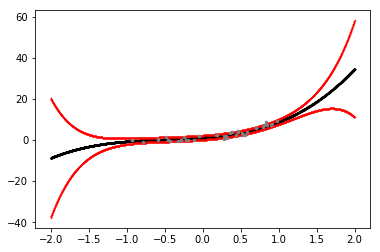

In [37]:
draw_incomes(test, 10)

## fifty point

In [36]:
for i in np.arange(40):
    buf = Q1_b_glo(1)
    test.update(buf)


Add data point:(-0.457455, -0.099101) 

Postirior mean:
[[-0.04380706]
 [ 0.02003974]
 [-0.00916727]
 [ 0.00419361]]

Posterior variance:
[[ 0.55795645  0.20221487 -0.09250413  0.04231644]
 [ 0.20221487  0.90749587  0.04231644 -0.01935785]
 [-0.09250413  0.04231644  0.98064215  0.00885534]
 [ 0.04231644 -0.01935785  0.00885534  0.99594908]]

Add data point:(0.277107, 0.432092) 

Postirior mean:
[[ 0.12116213]
 [ 0.14395239]
 [-0.01060246]
 [ 0.0201601 ]]

Posterior variance:
[[ 0.34505892  0.04230201 -0.09065198  0.02171122]
 [ 0.04230201  0.78738117  0.04370764 -0.03483496]
 [-0.09065198  0.04370764  0.98062604  0.0090346 ]
 [ 0.02171122 -0.03483496  0.0090346   0.99395482]]

Add data point:(0.439948, 2.217426) 

Postirior mean:
[[0.57693224]
 [0.66027416]
 [0.1454601 ]
 [0.14167374]]

Posterior variance:
[[ 2.67058658e-01 -4.60610323e-02 -1.17360443e-01  9.15443596e-04]
 [-4.60610323e-02  6.87278598e-01  1.34508013e-02 -5.83935836e-02]
 [-1.17360443e-01  1.34508013e-02  9.71480654e-

Add data point:(-0.118496, 0.227609) 

Postirior mean:
[[1.23575728]
 [2.70195784]
 [2.3538014 ]
 [2.16307083]]

Posterior variance:
[[ 0.05840556 -0.00435941 -0.09673772  0.00578949]
 [-0.00435941  0.24476236 -0.02950036 -0.24964097]
 [-0.09673772 -0.02950036  0.4762767  -0.09089756]
 [ 0.00578949 -0.24964097 -0.09089756  0.71925698]]

Add data point:(0.468471, 3.848136) 

Postirior mean:
[[1.256178  ]
 [2.74663331]
 [2.34501238]
 [2.13040045]]

Posterior variance:
[[ 0.05720483 -0.00698631 -0.09622093  0.0077105 ]
 [-0.00698631  0.23901535 -0.02836975 -0.24543828]
 [-0.09622093 -0.02836975  0.47605428 -0.09172436]
 [ 0.0077105  -0.24543828 -0.09172436  0.71618363]]

Add data point:(0.364245, 3.607972) 

Postirior mean:
[[1.29367341]
 [2.80380694]
 [2.30258444]
 [2.07784028]]

Posterior variance:
[[ 0.05551395 -0.00956459 -0.09430762  0.01008073]
 [-0.00956459  0.23508394 -0.0254523  -0.24182411]
 [-0.09430762 -0.0254523   0.47388927 -0.0944064 ]
 [ 0.01008073 -0.24182411 -0.0944064  

After 50 incomes
x, var -2.0            0
0  29.145034
x, var -1.9991998399679936            0
0  29.076383
x, var -1.998399679935987            0
0  29.007872
x, var -1.9975995199039809          0
0  28.9395
x, var -1.9967993598719744            0
0  28.871266
x, var -1.995999199839968            0
0  28.803171
x, var -1.9951990398079615            0
0  28.735215
x, var -1.994398879775955            0
0  28.667396
x, var -1.9935987197439489            0
0  28.599715
x, var -1.9927985597119424            0
0  28.532173
x, var -1.991998399679936            0
0  28.464767
x, var -1.9911982396479295            0
0  28.397499
x, var -1.990398079615923            0
0  28.330367
x, var -1.9895979195839169            0
0  28.263373
x, var -1.9887977595519104            0
0  28.196515
x, var -1.987997599519904            0
0  28.129793
x, var -1.9871974394878975            0
0  28.063208
x, var -1.9863972794558913            0
0  27.996758
x, var -1.9855971194238848            0
0  27.930444
x

x, var -1.8719743948789758            0
0  19.788415
x, var -1.8711742348469693            0
0  19.739359
x, var -1.870374074814963            0
0  19.690411
x, var -1.8695739147829566            0
0  19.641568
x, var -1.8687737547509502            0
0  19.592832
x, var -1.8679735947189438            0
0  19.544202
x, var -1.8671734346869373            0
0  19.495678
x, var -1.866373274654931           0
0  19.44726
x, var -1.8655731146229246            0
0  19.398947
x, var -1.8647729545909182            0
0  19.350739
x, var -1.8639727945589117            0
0  19.302637
x, var -1.8631726345269053            0
0  19.254639
x, var -1.862372474494899            0
0  19.206746
x, var -1.8615723144628926            0
0  19.158958
x, var -1.8607721544308862            0
0  19.111274
x, var -1.8599719943988797            0
0  19.063694
x, var -1.8591718343668733            0
0  19.016218
x, var -1.858371674334867            0
0  18.968847
x, var -1.8575715143028606            0
0  18.921579

x, var -1.7391478295659133            0
0  12.974192
x, var -1.7383476695339068           0
0  12.94048
x, var -1.7375475095019004            0
0  12.906848
x, var -1.736747349469894            0
0  12.873295
x, var -1.7359471894378875            0
0  12.839821
x, var -1.7351470294058813            0
0  12.806425
x, var -1.7343468693738748            0
0  12.773108
x, var -1.7335467093418684            0
0  12.739869
x, var -1.732746549309862            0
0  12.706709
x, var -1.7319463892778555            0
0  12.673626
x, var -1.7311462292458493            0
0  12.640622
x, var -1.7303460692138428            0
0  12.607695
x, var -1.7295459091818364            0
0  12.574846
x, var -1.72874574914983            0
0  12.542075
x, var -1.7279455891178235           0
0  12.50938
x, var -1.7271454290858173            0
0  12.476764
x, var -1.7263452690538108            0
0  12.444224
x, var -1.7255451090218044            0
0  12.411761
x, var -1.724744948989798            0
0  12.379375
x,

x, var -1.6095219043808762           0
0  8.447726
x, var -1.6087217443488697           0
0  8.425046
x, var -1.6079215843168635           0
0  8.402424
x, var -1.607121424284857          0
0  8.37986
x, var -1.6063212642528506           0
0  8.357353
x, var -1.6055211042208442           0
0  8.334904
x, var -1.6047209441888377           0
0  8.312512
x, var -1.6039207841568315           0
0  8.290177
x, var -1.603120624124825         0
0  8.2679
x, var -1.6023204640928186           0
0  8.245679
x, var -1.6015203040608121           0
0  8.223515
x, var -1.6007201440288057           0
0  8.201408
x, var -1.5999199839967995           0
0  8.179357
x, var -1.599119823964793           0
0  8.157363
x, var -1.5983196639327866           0
0  8.135425
x, var -1.5975195039007801           0
0  8.113544
x, var -1.5967193438687737           0
0  8.091719
x, var -1.5959191838367675           0
0  8.069949
x, var -1.595119023804761           0
0  8.048236
x, var -1.5943188637727546           0
0 

x, var -1.473494698939788           0
0  5.333758
x, var -1.4726945389077817           0
0  5.319356
x, var -1.471894378875775           0
0  5.304995
x, var -1.4710942188437688           0
0  5.290674
x, var -1.4702940588117623           0
0  5.276393
x, var -1.469493898779756           0
0  5.262152
x, var -1.4686937387477497           0
0  5.247951
x, var -1.467893578715743           0
0  5.233789
x, var -1.4670934186837368           0
0  5.219668
x, var -1.4662932586517303           0
0  5.205586
x, var -1.4654930986197239           0
0  5.191544
x, var -1.4646929385877177           0
0  5.177541
x, var -1.463892778555711           0
0  5.163578
x, var -1.4630926185237048           0
0  5.149654
x, var -1.4622924584916983           0
0  5.135769
x, var -1.4614922984596919           0
0  5.121923
x, var -1.4606921384276856           0
0  5.108117
x, var -1.459891978395679           0
0  5.094349
x, var -1.4590918183636727           0
0  5.080621
x, var -1.4582916583316663           

x, var -1.3430686137227446           0
0  3.458954
x, var -1.342268453690738           0
0  3.450039
x, var -1.3414682936587319           0
0  3.441152
x, var -1.3406681336267252           0
0  3.432292
x, var -1.339867973594719          0
0  3.42346
x, var -1.3390678135627125           0
0  3.414655
x, var -1.338267653530706           0
0  3.405878
x, var -1.3374674934986999           0
0  3.397127
x, var -1.3366673334666932           0
0  3.388404
x, var -1.335867173434687           0
0  3.379708
x, var -1.3350670134026805           0
0  3.371039
x, var -1.334266853370674           0
0  3.362397
x, var -1.3334666933386679           0
0  3.353781
x, var -1.3326665333066612           0
0  3.345193
x, var -1.331866373274655           0
0  3.336631
x, var -1.3310662132426485           0
0  3.328096
x, var -1.330266053210642           0
0  3.319588
x, var -1.3294658931786358           0
0  3.311106
x, var -1.3286657331466292          0
0  3.30265
x, var -1.327865573114623           0
0  3

0  2.293962
x, var -1.2070414082816563           0
0  2.288837
x, var -1.20624124824965           0
0  2.283729
x, var -1.2054410882176434           0
0  2.278639
x, var -1.2046409281856372           0
0  2.273567
x, var -1.2038407681536307           0
0  2.268513
x, var -1.2030406081216243           0
0  2.263476
x, var -1.202240448089618           0
0  2.258456
x, var -1.2014402880576114           0
0  2.253454
x, var -1.2006401280256052           0
0  2.248469
x, var -1.1998399679935987           0
0  2.243502
x, var -1.1990398079615923           0
0  2.238552
x, var -1.198239647929586          0
0  2.23362
x, var -1.1974394878975794           0
0  2.228704
x, var -1.1966393278655731           0
0  2.223806
x, var -1.1958391678335667           0
0  2.218925
x, var -1.1950390078015602           0
0  2.214061
x, var -1.194238847769554           0
0  2.209214
x, var -1.1934386877375474           0
0  2.204384
x, var -1.1926385277055411           0
0  2.199571
x, var -1.1918383676735347

x, var -1.0734146829365874           0
0  1.647204
x, var -1.072614522904581           0
0  1.644451
x, var -1.0718143628725745           0
0  1.641708
x, var -1.0710142028405683           0
0  1.638976
x, var -1.0702140428085616           0
0  1.636255
x, var -1.0694138827765554           0
0  1.633544
x, var -1.068613722744549           0
0  1.630844
x, var -1.0678135627125425           0
0  1.628155
x, var -1.0670134026805362           0
0  1.625477
x, var -1.0662132426485296           0
0  1.622809
x, var -1.0654130826165233           0
0  1.620152
x, var -1.064612922584517           0
0  1.617505
x, var -1.0638127625525104           0
0  1.614869
x, var -1.0630126025205042           0
0  1.612243
x, var -1.0622124424884976           0
0  1.609628
x, var -1.0614122824564913           0
0  1.607023
x, var -1.0606121224244849           0
0  1.604429
x, var -1.0598119623924784           0
0  1.601845
x, var -1.0590118023604722           0
0  1.599271
x, var -1.0582116423284655        

x, var -0.9405881176235247           0
0  1.315462
x, var -0.9397879575915182           0
0  1.314098
x, var -0.938987797559512           0
0  1.312741
x, var -0.9381876375275056           0
0  1.311389
x, var -0.9373874774954991           0
0  1.310044
x, var -0.9365873174634927           0
0  1.308705
x, var -0.9357871574314862           0
0  1.307372
x, var -0.93498699739948           0
0  1.306045
x, var -0.9341868373674735           0
0  1.304725
x, var -0.9333866773354671          0
0  1.30341
x, var -0.9325865173034606           0
0  1.302101
x, var -0.9317863572714542           0
0  1.300798
x, var -0.930986197239448           0
0  1.299501
x, var -0.9301860372074415          0
0  1.29821
x, var -0.9293858771754351           0
0  1.296925
x, var -0.9285857171434286           0
0  1.295646
x, var -0.9277855571114222           0
0  1.294373
x, var -0.926985397079416           0
0  1.293106
x, var -0.9261852370474095           0
0  1.291844
x, var -0.9253850770154031           0
0

0  1.158689
x, var -0.8069613922784558           0
0  1.158085
x, var -0.8061612322464493           0
0  1.157485
x, var -0.8053610722144429           0
0  1.156888
x, var -0.8045609121824364           0
0  1.156294
x, var -0.8037607521504302           0
0  1.155703
x, var -0.8029605921184237           0
0  1.155116
x, var -0.8021604320864173           0
0  1.154531
x, var -0.8013602720544108          0
0  1.15395
x, var -0.8005601120224044           0
0  1.153372
x, var -0.7997599519903982           0
0  1.152797
x, var -0.7989597919583917           0
0  1.152224
x, var -0.7981596319263853           0
0  1.151655
x, var -0.7973594718943788           0
0  1.151089
x, var -0.7965593118623724           0
0  1.150526
x, var -0.7957591518303662           0
0  1.149966
x, var -0.7949589917983597           0
0  1.149409
x, var -0.7941588317663533           0
0  1.148855
x, var -0.7933586717343468           0
0  1.148304
x, var -0.7925585117023404           0
0  1.147756
x, var -0.79175835167

x, var -0.6725345069013802           0
0  1.092353
x, var -0.6717343468693739           0
0  1.092123
x, var -0.6709341868373675           0
0  1.091894
x, var -0.670134026805361           0
0  1.091667
x, var -0.6693338667733546           0
0  1.091441
x, var -0.6685337067413482           0
0  1.091217
x, var -0.6677335467093419           0
0  1.090994
x, var -0.6669333866773355           0
0  1.090772
x, var -0.666133226645329           0
0  1.090552
x, var -0.6653330666133226           0
0  1.090333
x, var -0.6645329065813164           0
0  1.090115
x, var -0.6637327465493099           0
0  1.089899
x, var -0.6629325865173035           0
0  1.089684
x, var -0.662132426485297          0
0  1.08947
x, var -0.6613322664532906           0
0  1.089258
x, var -0.6605321064212843           0
0  1.089047
x, var -0.6597319463892779           0
0  1.088837
x, var -0.6589317863572715           0
0  1.088628
x, var -0.658131626325265           0
0  1.088421
x, var -0.6573314662932586           

x, var -0.5397079415883177           0
0  1.068387
x, var -0.5389077815563112           0
0  1.068304
x, var -0.5381076215243048           0
0  1.068221
x, var -0.5373074614922984           0
0  1.068139
x, var -0.5365073014602921           0
0  1.068057
x, var -0.5357071414282857           0
0  1.067976
x, var -0.5349069813962792           0
0  1.067895
x, var -0.5341068213642728           0
0  1.067815
x, var -0.5333066613322663           0
0  1.067735
x, var -0.5325065013002601           0
0  1.067656
x, var -0.5317063412682537           0
0  1.067577
x, var -0.5309061812362472           0
0  1.067499
x, var -0.5301060212042408           0
0  1.067421
x, var -0.5293058611722345           0
0  1.067344
x, var -0.5285057011402281           0
0  1.067266
x, var -0.5277055411082217          0
0  1.06719
x, var -0.5269053810762152           0
0  1.067114
x, var -0.5261052210442088           0
0  1.067038
x, var -0.5253050610122025           0
0  1.066963
x, var -0.5245049009801961       

x, var -0.4012802560512103           0
0  1.058782
x, var -0.40048009601920387           0
0  1.058743
x, var -0.3996799359871974           0
0  1.058704
x, var -0.398879775955191           0
0  1.058666
x, var -0.3980796159231845           0
0  1.058628
x, var -0.3972794558911783           0
0  1.058589
x, var -0.39647929585917185           0
0  1.058551
x, var -0.3956791358271654           0
0  1.058513
x, var -0.39487897579515896           0
0  1.058475
x, var -0.39407881576315273           0
0  1.058437
x, var -0.3932786557311463           0
0  1.058399
x, var -0.39247849569913984           0
0  1.058362
x, var -0.3916783356671334           0
0  1.058324
x, var -0.39087817563512695           0
0  1.058286
x, var -0.3900780156031207           0
0  1.058249
x, var -0.3892778555711143           0
0  1.058212
x, var -0.3884776955391078           0
0  1.058174
x, var -0.3876775355071014           0
0  1.058137
x, var -0.38687737547509493         0
0  1.0581
x, var -0.3860772154430887   

x, var -0.24844968993798755           0
0  1.052419
x, var -0.2476495299059811           0
0  1.052389
x, var -0.24684936987397488           0
0  1.052359
x, var -0.24604920984196843           0
0  1.052329
x, var -0.24524904980996198           0
0  1.052299
x, var -0.24444888977795554           0
0  1.052269
x, var -0.2436487297459491           0
0  1.052239
x, var -0.24284856971394286           0
0  1.052209
x, var -0.24204840968193642           0
0  1.052179
x, var -0.24124824964992997           0
0  1.052149
x, var -0.24044808961792352           0
0  1.052119
x, var -0.23964792958591707          0
0  1.05209
x, var -0.23884776955391085          0
0  1.05206
x, var -0.2380476095219044          0
0  1.05203
x, var -0.23724744948989795        0
0  1.052
x, var -0.2364472894578915          0
0  1.05197
x, var -0.23564712942588528           0
0  1.051941
x, var -0.23484696939387883           0
0  1.051911
x, var -0.2340468093618724           0
0  1.051881
x, var -0.23324664932986594    

x, var -0.09321864372874566           0
0  1.047316
x, var -0.09241848369673944           0
0  1.047296
x, var -0.09161832366473299           0
0  1.047275
x, var -0.09081816363272655           0
0  1.047254
x, var -0.0900180036007201           0
0  1.047233
x, var -0.08921784356871365           0
0  1.047212
x, var -0.08841768353670743           0
0  1.047192
x, var -0.08761752350470098           0
0  1.047171
x, var -0.08681736347269453           0
0  1.047151
x, var -0.08601720344068808          0
0  1.04713
x, var -0.08521704340868164          0
0  1.04711
x, var -0.08441688337667541          0
0  1.04709
x, var -0.08361672334466896          0
0  1.04707
x, var -0.08281656331266252          0
0  1.04705
x, var -0.08201640328065607          0
0  1.04703
x, var -0.08121624324864962          0
0  1.04701
x, var -0.0804160832166434          0
0  1.04699
x, var -0.07961592318463695          0
0  1.04697
x, var -0.0788157631526305          0
0  1.04695
x, var -0.07801560312062406        

x, var 0.03960792158431703           0
0  1.044921
x, var 0.040408081616323255           0
0  1.044913
x, var 0.04120824164832948           0
0  1.044906
x, var 0.04200840168033615           0
0  1.044898
x, var 0.042808561712342375           0
0  1.044891
x, var 0.043608721744349044           0
0  1.044884
x, var 0.04440888177635527           0
0  1.044877
x, var 0.045209041808361494          0
0  1.04487
x, var 0.046009201840368164           0
0  1.044863
x, var 0.04680936187237439           0
0  1.044856
x, var 0.04760952190438106           0
0  1.044849
x, var 0.04840968193638728           0
0  1.044843
x, var 0.04920984196839351           0
0  1.044836
x, var 0.05001000200040018          0
0  1.04483
x, var 0.0508101620324064           0
0  1.044823
x, var 0.05161032206441307           0
0  1.044817
x, var 0.0524104820964193          0
0  1.04481
x, var 0.05321064212842552           0
0  1.044804
x, var 0.05401080216043219           0
0  1.044798
x, var 0.05481096219243842        

x, var 0.19483896779355891           0
0  1.044765
x, var 0.19563912782556514           0
0  1.044769
x, var 0.19643928785757137           0
0  1.044773
x, var 0.19723944788957803           0
0  1.044777
x, var 0.19803960792158426           0
0  1.044781
x, var 0.19883976795359093           0
0  1.044785
x, var 0.19963992798559715          0
0  1.04479
x, var 0.20044008801760338           0
0  1.044794
x, var 0.20124024804961005           0
0  1.044798
x, var 0.20204040808161627           0
0  1.044802
x, var 0.20284056811362294           0
0  1.044807
x, var 0.20364072814562917           0
0  1.044811
x, var 0.2044408881776354           0
0  1.044815
x, var 0.20524104820964206          0
0  1.04482
x, var 0.2060412082416483           0
0  1.044824
x, var 0.20684136827365496           0
0  1.044829
x, var 0.20764152830566118           0
0  1.044833
x, var 0.2084416883376674           0
0  1.044838
x, var 0.20924184836967408           0
0  1.044842
x, var 0.2100420084016803           0


0  1.045491
x, var 0.32766553310662117           0
0  1.045494
x, var 0.32846569313862783           0
0  1.045497
x, var 0.32926585317063406         0
0  1.0455
x, var 0.33006601320264073           0
0  1.045503
x, var 0.33086617323464695           0
0  1.045506
x, var 0.3316663332666532           0
0  1.045509
x, var 0.33246649329865985           0
0  1.045511
x, var 0.3332666533306661           0
0  1.045514
x, var 0.33406681336267274           0
0  1.045517
x, var 0.33486697339467897           0
0  1.045519
x, var 0.3356671334266852           0
0  1.045522
x, var 0.33646729345869186           0
0  1.045525
x, var 0.3372674534906981           0
0  1.045527
x, var 0.33806761352270476          0
0  1.04553
x, var 0.338867773554711           0
0  1.045532
x, var 0.3396679335867172           0
0  1.045535
x, var 0.3404680936187239           0
0  1.045537
x, var 0.3412682536507301          0
0  1.04554
x, var 0.34206841368273677           0
0  1.045542
x, var 0.342868573714743           0

x, var 0.49009801960392085           0
0  1.045461
x, var 0.4908981796359271          0
0  1.04546
x, var 0.49169833966793375           0
0  1.045459
x, var 0.49249849969994           0
0  1.045459
x, var 0.4932986597319462           0
0  1.045458
x, var 0.49409881976395287           0
0  1.045458
x, var 0.4948989797959591           0
0  1.045457
x, var 0.49569913982796576           0
0  1.045457
x, var 0.496499299859972           0
0  1.045456
x, var 0.4972994598919782           0
0  1.045456
x, var 0.4980996199239849           0
0  1.045456
x, var 0.4988997799559911           0
0  1.045456
x, var 0.4996999399879978           0
0  1.045455
x, var 0.500500100020004           0
0  1.045455
x, var 0.5013002600520102           0
0  1.045455
x, var 0.5021004200840169           0
0  1.045455
x, var 0.5029005801160231           0
0  1.045456
x, var 0.5037007401480298           0
0  1.045456
x, var 0.504500900180036           0
0  1.045456
x, var 0.5053010602120422           0
0  1.045456
x, 

0  1.047586
x, var 0.628525705141028           0
0  1.047624
x, var 0.6293258651730347           0
0  1.047662
x, var 0.6301260252050409           0
0  1.047701
x, var 0.6309261852370476           0
0  1.047741
x, var 0.6317263452690538           0
0  1.047781
x, var 0.63252650530106           0
0  1.047821
x, var 0.6333266653330667           0
0  1.047862
x, var 0.6341268253650729           0
0  1.047904
x, var 0.6349269853970796           0
0  1.047946
x, var 0.6357271454290858           0
0  1.047988
x, var 0.636527305461092           0
0  1.048031
x, var 0.6373274654930987           0
0  1.048075
x, var 0.6381276255251049           0
0  1.048119
x, var 0.6389277855571116           0
0  1.048164
x, var 0.6397279455891178           0
0  1.048209
x, var 0.640528105621124           0
0  1.048254
x, var 0.6413282656531307           0
0  1.048301
x, var 0.642128425685137           0
0  1.048348
x, var 0.6429285857171436           0
0  1.048395
x, var 0.6437287457491498           0
0  1.0

0  1.064687
x, var 0.7629525905181036           0
0  1.064882
x, var 0.7637527505501098           0
0  1.065079
x, var 0.7645529105821165           0
0  1.065278
x, var 0.7653530706141227           0
0  1.065477
x, var 0.7661532306461294           0
0  1.065679
x, var 0.7669533906781356           0
0  1.065882
x, var 0.7677535507101418           0
0  1.066086
x, var 0.7685537107421485           0
0  1.066293
x, var 0.7693538707741547         0
0  1.0665
x, var 0.7701540308061614           0
0  1.066709
x, var 0.7709541908381676          0
0  1.06692
x, var 0.7717543508701739           0
0  1.067133
x, var 0.7725545109021805           0
0  1.067347
x, var 0.7733546709341867           0
0  1.067563
x, var 0.7741548309661934          0
0  1.06778
x, var 0.7749549909981996           0
0  1.067999
x, var 0.7757551510302059          0
0  1.06822
x, var 0.7765553110622125           0
0  1.068442
x, var 0.7773554710942188           0
0  1.068666
x, var 0.7781556311262254           0
0  1.06889

x, var 0.8997799559911983           0
0  1.129056
x, var 0.9005801160232045           0
0  1.129669
x, var 0.9013802760552112           0
0  1.130287
x, var 0.9021804360872174           0
0  1.130907
x, var 0.9029805961192237           0
0  1.131532
x, var 0.9037807561512303           0
0  1.132159
x, var 0.9045809161832365           0
0  1.132791
x, var 0.9053810762152432           0
0  1.133426
x, var 0.9061812362472494           0
0  1.134065
x, var 0.9069813962792557           0
0  1.134707
x, var 0.9077815563112623           0
0  1.135353
x, var 0.9085817163432686           0
0  1.136003
x, var 0.9093818763752752           0
0  1.136657
x, var 0.9101820364072815           0
0  1.137314
x, var 0.9109821964392877           0
0  1.137975
x, var 0.9117823564712944          0
0  1.13864
x, var 0.9125825165033006           0
0  1.139308
x, var 0.9133826765353072           0
0  1.139981
x, var 0.9141828365673135           0
0  1.140657
x, var 0.9149829965993197           0
0  1.141337
x,

x, var 1.0358071614322863           0
0  1.298564
x, var 1.036607321464293           0
0  1.300046
x, var 1.0374074814962992           0
0  1.301534
x, var 1.0382076415283055          0
0  1.30303
x, var 1.0390078015603121           0
0  1.304532
x, var 1.0398079615923184           0
0  1.306042
x, var 1.040608121624325           0
0  1.307558
x, var 1.0414082816563313           0
0  1.309082
x, var 1.0422084416883375           0
0  1.310612
x, var 1.0430086017203442          0
0  1.31215
x, var 1.0438087617523504           0
0  1.313695
x, var 1.044608921784357           0
0  1.315247
x, var 1.0454090818163633           0
0  1.316807
x, var 1.0462092418483695           0
0  1.318373
x, var 1.0470094018803762           0
0  1.319947
x, var 1.0478095619123824           0
0  1.321528
x, var 1.048609721944389           0
0  1.323116
x, var 1.0494098819763953           0
0  1.324712
x, var 1.0502100420084015           0
0  1.326315
x, var 1.0510102020404082           0
0  1.327925
x, var 1

x, var 1.170234046809362           0
0  1.666449
x, var 1.1710342068413682           0
0  1.669501
x, var 1.1718343668733748           0
0  1.672566
x, var 1.172634526905381           0
0  1.675642
x, var 1.1734346869373873           0
0  1.678731
x, var 1.174234846969394           0
0  1.681831
x, var 1.1750350070014002           0
0  1.684944
x, var 1.1758351670334068          0
0  1.68807
x, var 1.176635327065413           0
0  1.691208
x, var 1.1774354870974193           0
0  1.694358
x, var 1.178235647129426          0
0  1.69752
x, var 1.1790358071614322           0
0  1.700695
x, var 1.1798359671934389           0
0  1.703883
x, var 1.180636127225445           0
0  1.707083
x, var 1.1814362872574513           0
0  1.710296
x, var 1.182236447289458           0
0  1.713521
x, var 1.1830366073214642           0
0  1.716759
x, var 1.1838367673534709          0
0  1.72001
x, var 1.184636927385477           0
0  1.723273
x, var 1.1854370874174833           0
0  1.726549
x, var 1.18623

x, var 1.302260452090418           0
0  2.364175
x, var 1.3030606121224246           0
0  2.369798
x, var 1.3038607721544309           0
0  2.375441
x, var 1.304660932186437           0
0  2.381103
x, var 1.3054610922184438           0
0  2.386785
x, var 1.30626125225045           0
0  2.392486
x, var 1.3070614122824566           0
0  2.398208
x, var 1.3078615723144629           0
0  2.403949
x, var 1.308661732346469           0
0  2.409709
x, var 1.3094618923784758          0
0  2.41549
x, var 1.310262052410482           0
0  2.421291
x, var 1.3110622124424887           0
0  2.427112
x, var 1.3118623724744949           0
0  2.432952
x, var 1.3126625325065011           0
0  2.438813
x, var 1.3134626925385078           0
0  2.444694
x, var 1.314262852570514           0
0  2.450595
x, var 1.3150630126025207           0
0  2.456517
x, var 1.315863172634527           0
0  2.462458
x, var 1.3166633326665331          0
0  2.46842
x, var 1.3174634926985398           0
0  2.474403
x, var 1.318

x, var 1.4582916583316665           0
0  3.900296
x, var 1.4590918183636727           0
0  3.910857
x, var 1.459891978395679           0
0  3.921449
x, var 1.4606921384276856           0
0  3.932073
x, var 1.4614922984596919          0
0  3.94273
x, var 1.4622924584916985           0
0  3.953418
x, var 1.4630926185237048           0
0  3.964139
x, var 1.463892778555711           0
0  3.974892
x, var 1.4646929385877177           0
0  3.985678
x, var 1.4654930986197239           0
0  3.996496
x, var 1.4662932586517305           0
0  4.007346
x, var 1.4670934186837368          0
0  4.01823
x, var 1.467893578715743           0
0  4.029146
x, var 1.4686937387477497           0
0  4.040094
x, var 1.469493898779756           0
0  4.051076
x, var 1.4702940588117626          0
0  4.06209
x, var 1.4710942188437688           0
0  4.073138
x, var 1.471894378875775           0
0  4.084218
x, var 1.4726945389077817           0
0  4.095332
x, var 1.473494698939788           0
0  4.106479
x, var 1.474

x, var 1.6207241448289658           0
0  6.812525
x, var 1.621524304860972           0
0  6.831315
x, var 1.6223244648929787           0
0  6.850156
x, var 1.6231246249249849           0
0  6.869046
x, var 1.6239247849569916           0
0  6.887988
x, var 1.6247249449889978           0
0  6.906979
x, var 1.625525105021004           0
0  6.926022
x, var 1.6263252650530107           0
0  6.945115
x, var 1.627125425085017           0
0  6.964259
x, var 1.6279255851170236           0
0  6.983454
x, var 1.6287257451490298         0
0  7.0027
x, var 1.629525905181036           0
0  7.021998
x, var 1.6303260652130427           0
0  7.041346
x, var 1.631126225245049           0
0  7.060746
x, var 1.6319263852770556           0
0  7.080198
x, var 1.6327265453090618           0
0  7.099701
x, var 1.633526705341068           0
0  7.119256
x, var 1.6343268653730747           0
0  7.138863
x, var 1.635127025405081           0
0  7.158522
x, var 1.6359271854370876           0
0  7.178233
x, var 1.63

x, var 1.7759551910382076            0
0  11.535003
x, var 1.7767553510702139            0
0  11.565729
x, var 1.7775555111022205            0
0  11.596528
x, var 1.7783556711342268            0
0  11.627402
x, var 1.7791558311662334           0
0  11.65835
x, var 1.7799559911982397            0
0  11.689372
x, var 1.7807561512302459            0
0  11.720469
x, var 1.7815563112622526            0
0  11.751641
x, var 1.7823564712942588            0
0  11.782888
x, var 1.7831566313262655           0
0  11.81421
x, var 1.7839567913582717            0
0  11.845607
x, var 1.784756951390278            0
0  11.877079
x, var 1.7855571114222846            0
0  11.908627
x, var 1.7863572714542908           0
0  11.94025
x, var 1.7871574314862975            0
0  11.971949
x, var 1.7879575915183037            0
0  12.003724
x, var 1.78875775155031            0
0  12.035575
x, var 1.7895579115823166            0
0  12.067503
x, var 1.7903580716143228            0
0  12.099506
x, var 1.791158231646

x, var 1.9047809561912383            0
0  17.537373
x, var 1.9055811162232446            0
0  17.581978
x, var 1.9063812762552512            0
0  17.626682
x, var 1.9071814362872574            0
0  17.671485
x, var 1.9079815963192637            0
0  17.716389
x, var 1.9087817563512703            0
0  17.761392
x, var 1.9095819163832766            0
0  17.806496
x, var 1.9103820764152832          0
0  17.8517
x, var 1.9111822364472895            0
0  17.897004
x, var 1.9119823964792957            0
0  17.942409
x, var 1.9127825565113024            0
0  17.987915
x, var 1.9135827165433086            0
0  18.033522
x, var 1.9143828765753153           0
0  18.07923
x, var 1.9151830366073215           0
0  18.12504
x, var 1.9159831966393277            0
0  18.170951
x, var 1.9167833566713344            0
0  18.216963
x, var 1.9175835167033406            0
0  18.263078
x, var 1.9183836767353473            0
0  18.309295
x, var 1.9191838367673535            0
0  18.355614
x, var 1.91998399679

x, var -1.9679935987197439            0
0  26.505417
x, var -1.9671934386877377            0
0  26.442163
x, var -1.9663932786557312           0
0  26.37904
x, var -1.9655931186237248            0
0  26.316047
x, var -1.9647929585917183            0
0  26.253184
x, var -1.9639927985597119           0
0  26.19045
x, var -1.9631926385277056            0
0  26.127846
x, var -1.9623924784956992            0
0  26.065372
x, var -1.9615923184636928            0
0  26.003027
x, var -1.9607921584316863            0
0  25.940811
x, var -1.9599919983996799            0
0  25.878723
x, var -1.9591918383676736            0
0  25.816764
x, var -1.9583916783356672            0
0  25.754933
x, var -1.9575915183036607            0
0  25.693231
x, var -1.9567913582716543            0
0  25.631656
x, var -1.9559911982396478            0
0  25.570209
x, var -1.9551910382076416           0
0  25.50889
x, var -1.9543908781756352            0
0  25.447698
x, var -1.9535907181436287            0
0  25.386633

x, var -1.8375675135027005            0
0  17.773046
x, var -1.836767353470694           0
0  17.72841
x, var -1.8359671934386879            0
0  17.683874
x, var -1.8351670334066814            0
0  17.639436
x, var -1.834366873374675            0
0  17.595097
x, var -1.8335667133426685            0
0  17.550856
x, var -1.832766553310662            0
0  17.506714
x, var -1.8319663932786558            0
0  17.462669
x, var -1.8311662332466494            0
0  17.418723
x, var -1.830366073214643            0
0  17.374874
x, var -1.8295659131826365            0
0  17.331122
x, var -1.82876575315063            0
0  17.287468
x, var -1.8279655931186238            0
0  17.243911
x, var -1.8271654330866174            0
0  17.200451
x, var -1.826365273054611            0
0  17.157087
x, var -1.8255651130226045            0
0  17.113821
x, var -1.824764952990598            0
0  17.070651
x, var -1.8239647929585918            0
0  17.027577
x, var -1.8231646329265854            0
0  16.984599
x, 

x, var -1.7031406281256252            0
0  11.533454
x, var -1.7023404680936187           0
0  11.50316
x, var -1.7015403080616123            0
0  11.472939
x, var -1.700740148029606            0
0  11.442791
x, var -1.6999399879975996            0
0  11.412714
x, var -1.6991398279655932           0
0  11.38271
x, var -1.6983396679335867            0
0  11.352779
x, var -1.6975395079015803            0
0  11.322919
x, var -1.696739347869574            0
0  11.293131
x, var -1.6959391878375676            0
0  11.263415
x, var -1.6951390278055611           0
0  11.23377
x, var -1.6943388677735547            0
0  11.204197
x, var -1.6935387077415482            0
0  11.174695
x, var -1.692738547709542            0
0  11.145264
x, var -1.6919383876775356            0
0  11.115905
x, var -1.6911382276455291            0
0  11.086616
x, var -1.6903380676135227            0
0  11.057398
x, var -1.6895379075815162            0
0  11.028251
x, var -1.68873774754951            0
0  10.999174
x, v

x, var -1.575115023004601           0
0  7.523245
x, var -1.5743148629725945           0
0  7.502946
x, var -1.573514702940588         0
0  7.4827
x, var -1.5727145429085816           0
0  7.462507
x, var -1.5719143828765754           0
0  7.442367
x, var -1.571114222844569           0
0  7.422279
x, var -1.5703140628125625           0
0  7.402243
x, var -1.5695139027805562          0
0  7.38226
x, var -1.5687137427485496           0
0  7.362329
x, var -1.5679135827165434          0
0  7.34245
x, var -1.567113422684537           0
0  7.322623
x, var -1.5663132626525305           0
0  7.302848
x, var -1.5655131026205242           0
0  7.283125
x, var -1.5647129425885176           0
0  7.263454
x, var -1.5639127825565113           0
0  7.243834
x, var -1.563112622524505           0
0  7.224266
x, var -1.5623124624924984           0
0  7.204749
x, var -1.5615123024604922           0
0  7.185284
x, var -1.5607121424284858           0
0  7.165869
x, var -1.5599119823964793           0
0  7.

x, var -1.4150830166033206           0
0  4.382926
x, var -1.4142828565713144          0
0  4.37124
x, var -1.413482696539308           0
0  4.359588
x, var -1.4126825365073015          0
0  4.34797
x, var -1.411882376475295           0
0  4.336386
x, var -1.4110822164432886           0
0  4.324836
x, var -1.4102820564112823           0
0  4.313319
x, var -1.409481896379276           0
0  4.301837
x, var -1.4086817363472695           0
0  4.290388
x, var -1.407881576315263           0
0  4.278973
x, var -1.4070814162832566           0
0  4.267591
x, var -1.4062812562512503           0
0  4.256242
x, var -1.4054810962192439           0
0  4.244927
x, var -1.4046809361872374           0
0  4.233646
x, var -1.403880776155231           0
0  4.222397
x, var -1.4030806161232245           0
0  4.211182
x, var -1.4022804560912183      0
0  4.2
x, var -1.4014802960592119          0
0  4.18885
x, var -1.4006801360272054           0
0  4.177734
x, var -1.3998799759951992          0
0  4.16665
x, 

x, var -1.2550510102020405           0
0  2.629613
x, var -1.254250850170034          0
0  2.62335
x, var -1.2534506901380276           0
0  2.617107
x, var -1.2526505301060213           0
0  2.610885
x, var -1.2518503700740147           0
0  2.604684
x, var -1.2510502100420084           0
0  2.598504
x, var -1.250250050010002           0
0  2.592344
x, var -1.2494498899779956           0
0  2.586204
x, var -1.2486497299459893           0
0  2.580085
x, var -1.2478495699139827           0
0  2.573987
x, var -1.2470494098819764           0
0  2.567909
x, var -1.24624924984997           0
0  2.561851
x, var -1.2454490898179635           0
0  2.555814
x, var -1.2446489297859573           0
0  2.549797
x, var -1.2438487697539506         0
0  2.5438
x, var -1.2430486097219444           0
0  2.537823
x, var -1.242248449689938           0
0  2.531866
x, var -1.2414482896579315           0
0  2.525929
x, var -1.2406481296259253           0
0  2.520012
x, var -1.2398479695939186           0
0  

x, var -1.1214242848569715           0
0  1.833604
x, var -1.1206241248249649           0
0  1.830134
x, var -1.1198239647929586           0
0  1.826678
x, var -1.1190238047609522           0
0  1.823234
x, var -1.1182236447289458           0
0  1.819803
x, var -1.1174234846969395           0
0  1.816386
x, var -1.1166233246649329           0
0  1.812981
x, var -1.1158231646329266           0
0  1.809589
x, var -1.1150230046009202           0
0  1.806209
x, var -1.1142228445689137           0
0  1.802843
x, var -1.1134226845369075           0
0  1.799489
x, var -1.1126225245049008           0
0  1.796148
x, var -1.1118223644728946          0
0  1.79282
x, var -1.1110222044408882           0
0  1.789504
x, var -1.1102220444088817           0
0  1.786201
x, var -1.1094218843768755          0
0  1.78291
x, var -1.1086217243448688           0
0  1.779632
x, var -1.1078215643128626           0
0  1.776366
x, var -1.1070214042808562           0
0  1.773113
x, var -1.1062212442488497         

x, var -0.9853970794158833           0
0  1.402429
x, var -0.9845969193838768           0
0  1.400681
x, var -0.9837967593518704          0
0  1.39894
x, var -0.9829965993198639           0
0  1.397207
x, var -0.9821964392878575           0
0  1.395481
x, var -0.9813962792558513           0
0  1.393763
x, var -0.9805961192238448           0
0  1.392053
x, var -0.9797959591918384           0
0  1.390349
x, var -0.9789957991598319           0
0  1.388654
x, var -0.9781956391278255           0
0  1.386965
x, var -0.9773954790958193           0
0  1.385284
x, var -0.9765953190638128          0
0  1.38361
x, var -0.9757951590318064           0
0  1.381944
x, var -0.9749949989997999           0
0  1.380284
x, var -0.9741948389677935           0
0  1.378632
x, var -0.9733946789357872           0
0  1.376988
x, var -0.9725945189037808          0
0  1.37535
x, var -0.9717943588717743          0
0  1.37372
x, var -0.9709941988397679           0
0  1.372096
x, var -0.9701940388077614          0
0

0  1.195619
x, var -0.849369873974795           0
0  1.194825
x, var -0.8485697139427886           0
0  1.194036
x, var -0.8477695539107821          0
0  1.19325
x, var -0.8469693938787757           0
0  1.192468
x, var -0.8461692338467695          0
0  1.19169
x, var -0.845369073814763           0
0  1.190916
x, var -0.8445689137827566           0
0  1.190146
x, var -0.8437687537507501          0
0  1.18938
x, var -0.8429685937187437           0
0  1.188618
x, var -0.8421684336867374          0
0  1.18786
x, var -0.841368273654731           0
0  1.187105
x, var -0.8405681136227245           0
0  1.186355
x, var -0.8397679535907181           0
0  1.185608
x, var -0.8389677935587116           0
0  1.184865
x, var -0.8381676335267054           0
0  1.184126
x, var -0.837367473494699          0
0  1.18339
x, var -0.8365673134626925           0
0  1.182658
x, var -0.8357671534306861           0
0  1.181931
x, var -0.8349669933986796           0
0  1.181206
x, var -0.8341668333666734       

x, var -0.7165433086617323           0
0  1.107384
x, var -0.7157431486297259           0
0  1.107065
x, var -0.7149429885977194           0
0  1.106748
x, var -0.7141428285657132           0
0  1.106432
x, var -0.7133426685337068           0
0  1.106118
x, var -0.7125425085017003           0
0  1.105806
x, var -0.7117423484696939           0
0  1.105496
x, var -0.7109421884376876           0
0  1.105188
x, var -0.7101420284056812           0
0  1.104881
x, var -0.7093418683736747           0
0  1.104577
x, var -0.7085417083416683           0
0  1.104274
x, var -0.7077415483096618           0
0  1.103973
x, var -0.7069413882776556           0
0  1.103673
x, var -0.7061412282456492           0
0  1.103376
x, var -0.7053410682136427          0
0  1.10308
x, var -0.7045409081816363           0
0  1.102786
x, var -0.7037407481496298           0
0  1.102493
x, var -0.7029405881176236           0
0  1.102203
x, var -0.7021404280856172           0
0  1.101914
x, var -0.7013402680536107       

x, var -0.5829165833166634           0
0  1.073696
x, var -0.582116423284657           0
0  1.073581
x, var -0.5813162632526505           0
0  1.073467
x, var -0.5805161032206441           0
0  1.073353
x, var -0.5797159431886376          0
0  1.07324
x, var -0.5789157831566314           0
0  1.073128
x, var -0.5781156231246249           0
0  1.073017
x, var -0.5773154630926185           0
0  1.072906
x, var -0.576515303060612           0
0  1.072796
x, var -0.5757151430286058           0
0  1.072686
x, var -0.5749149829965994           0
0  1.072577
x, var -0.5741148229645929           0
0  1.072469
x, var -0.5733146629325865           0
0  1.072362
x, var -0.57251450290058           0
0  1.072255
x, var -0.5717143428685738           0
0  1.072149
x, var -0.5709141828365674           0
0  1.072043
x, var -0.5701140228045609           0
0  1.071938
x, var -0.5693138627725545           0
0  1.071834
x, var -0.568513702740548          0
0  1.07173
x, var -0.5677135427085418           0
0

x, var -0.4516903380676136           0
0  1.061475
x, var -0.45089017803560716           0
0  1.061427
x, var -0.4500900180036007          0
0  1.06138
x, var -0.44928985797159426           0
0  1.061332
x, var -0.4484896979395878           0
0  1.061285
x, var -0.4476895379075816           0
0  1.061238
x, var -0.44688937787557514           0
0  1.061192
x, var -0.4460892178435687           0
0  1.061145
x, var -0.44528905781156225           0
0  1.061099
x, var -0.4444888977795558           0
0  1.061053
x, var -0.4436887377475496           0
0  1.061007
x, var -0.44288857771554313           0
0  1.060961
x, var -0.4420884176835367           0
0  1.060915
x, var -0.44128825765153024          0
0  1.06087
x, var -0.440488097619524           0
0  1.060825
x, var -0.43968793758751756           0
0  1.060779
x, var -0.4388877775555111           0
0  1.060734
x, var -0.43808761752350467          0
0  1.06069
x, var -0.4372874574914982           0
0  1.060645
x, var -0.436487297459492     

x, var -0.3236647329465894           0
0  1.055367
x, var -0.3228645729145829           0
0  1.055335
x, var -0.3220644128825765           0
0  1.055302
x, var -0.32126425285057003           0
0  1.055269
x, var -0.3204640928185638           0
0  1.055237
x, var -0.31966393278655736           0
0  1.055204
x, var -0.3188637727545509           0
0  1.055172
x, var -0.31806361272254446           0
0  1.055139
x, var -0.317263452690538           0
0  1.055107
x, var -0.3164632926585318           0
0  1.055074
x, var -0.31566313262652534           0
0  1.055042
x, var -0.3148629725945189           0
0  1.055009
x, var -0.31406281256251245           0
0  1.054977
x, var -0.313262652530506           0
0  1.054945
x, var -0.3124624924984998           0
0  1.054912
x, var -0.31166233246649333          0
0  1.05488
x, var -0.3108621724344869           0
0  1.054848
x, var -0.31006201240248044           0
0  1.054816
x, var -0.309261852370474           0
0  1.054784
x, var -0.30846169233846776  

x, var -0.1932386477295458           0
0  1.050413
x, var -0.19243848769753957           0
0  1.050385
x, var -0.19163832766553313           0
0  1.050357
x, var -0.19083816763352668           0
0  1.050329
x, var -0.19003800760152023           0
0  1.050302
x, var -0.189237847569514           0
0  1.050274
x, var -0.18843768753750756           0
0  1.050246
x, var -0.1876375275055011           0
0  1.050219
x, var -0.18683736747349466           0
0  1.050191
x, var -0.18603720744148822           0
0  1.050164
x, var -0.185237047409482           0
0  1.050136
x, var -0.18443688737747554           0
0  1.050109
x, var -0.1836367273454691           0
0  1.050081
x, var -0.18283656731346265           0
0  1.050054
x, var -0.1820364072814562           0
0  1.050027
x, var -0.18123624724944998           0
0  1.049999
x, var -0.18043608721744353           0
0  1.049972
x, var -0.17963592718543708           0
0  1.049945
x, var -0.17883576715343064           0
0  1.049918
x, var -0.1780356071

x, var -0.05881176235247043           0
0  1.046482
x, var -0.058011602320463984           0
0  1.046464
x, var -0.05721144228845776           0
0  1.046446
x, var -0.05641128225645131           0
0  1.046429
x, var -0.055611122224444864           0
0  1.046411
x, var -0.05481096219243842           0
0  1.046394
x, var -0.05401080216043219           0
0  1.046377
x, var -0.053210642128425745           0
0  1.046359
x, var -0.0524104820964193           0
0  1.046342
x, var -0.05161032206441285           0
0  1.046325
x, var -0.0508101620324064           0
0  1.046308
x, var -0.05001000200040018           0
0  1.046291
x, var -0.04920984196839373           0
0  1.046274
x, var -0.04840968193638728           0
0  1.046258
x, var -0.047609521904380836           0
0  1.046241
x, var -0.04680936187237439           0
0  1.046224
x, var -0.046009201840368164           0
0  1.046208
x, var -0.045209041808361716           0
0  1.046191
x, var -0.04440888177635527           0
0  1.046175
x, var -

x, var 0.07641528305661138           0
0  1.044659
x, var 0.07721544308861761           0
0  1.044655
x, var 0.07801560312062428           0
0  1.044652
x, var 0.0788157631526305           0
0  1.044648
x, var 0.07961592318463673           0
0  1.044644
x, var 0.0804160832166434           0
0  1.044641
x, var 0.08121624324864962           0
0  1.044637
x, var 0.08201640328065629           0
0  1.044634
x, var 0.08281656331266252           0
0  1.044631
x, var 0.08361672334466874           0
0  1.044627
x, var 0.08441688337667541           0
0  1.044624
x, var 0.08521704340868164           0
0  1.044621
x, var 0.0860172034406883           0
0  1.044618
x, var 0.08681736347269453           0
0  1.044615
x, var 0.08761752350470076           0
0  1.044612
x, var 0.08841768353670743           0
0  1.044609
x, var 0.08921784356871365           0
0  1.044607
x, var 0.09001800360072032           0
0  1.044604
x, var 0.09081816363272655           0
0  1.044601
x, var 0.09161832366473277        

x, var 0.23724744948989818           0
0  1.045008
x, var 0.2380476095219044           0
0  1.045013
x, var 0.23884776955391063           0
0  1.045018
x, var 0.2396479295859173           0
0  1.045023
x, var 0.24044808961792352           0
0  1.045027
x, var 0.2412482496499302           0
0  1.045032
x, var 0.24204840968193642           0
0  1.045037
x, var 0.24284856971394264           0
0  1.045042
x, var 0.2436487297459493           0
0  1.045047
x, var 0.24444888977795554           0
0  1.045052
x, var 0.2452490498099622           0
0  1.045057
x, var 0.24604920984196843           0
0  1.045062
x, var 0.24684936987397466           0
0  1.045067
x, var 0.24764952990598132           0
0  1.045072
x, var 0.24844968993798755           0
0  1.045077
x, var 0.24924984996999422           0
0  1.045082
x, var 0.25005001000200044           0
0  1.045086
x, var 0.25085017003400667           0
0  1.045091
x, var 0.25165033006601334           0
0  1.045096
x, var 0.25245049009801956          

x, var 0.3940788157631525           0
0  1.045612
x, var 0.3948789757951592           0
0  1.045612
x, var 0.3956791358271654           0
0  1.045612
x, var 0.39647929585917163           0
0  1.045612
x, var 0.3972794558911783           0
0  1.045612
x, var 0.3980796159231845           0
0  1.045611
x, var 0.3988797759551912           0
0  1.045611
x, var 0.3996799359871974           0
0  1.045611
x, var 0.40048009601920365          0
0  1.04561
x, var 0.4012802560512103          0
0  1.04561
x, var 0.40208041608321654           0
0  1.045609
x, var 0.4028805761152232           0
0  1.045609
x, var 0.40368073614722944           0
0  1.045608
x, var 0.40448089617923566           0
0  1.045608
x, var 0.40528105621124233           0
0  1.045607
x, var 0.40608121624324856           0
0  1.045606
x, var 0.4068813762752552           0
0  1.045606
x, var 0.40768153630726145           0
0  1.045605
x, var 0.4084816963392677           0
0  1.045604
x, var 0.40928185637127434           0
0  1.04

x, var 0.5253050610122023           0
0  1.045493
x, var 0.526105221044209           0
0  1.045495
x, var 0.5269053810762152           0
0  1.045498
x, var 0.5277055411082214           0
0  1.045501
x, var 0.5285057011402281           0
0  1.045504
x, var 0.5293058611722343           0
0  1.045508
x, var 0.530106021204241           0
0  1.045511
x, var 0.5309061812362472           0
0  1.045515
x, var 0.5317063412682534           0
0  1.045518
x, var 0.5325065013002601           0
0  1.045522
x, var 0.5333066613322663           0
0  1.045526
x, var 0.534106821364273          0
0  1.04553
x, var 0.5349069813962792           0
0  1.045534
x, var 0.5357071414282855           0
0  1.045538
x, var 0.5365073014602921           0
0  1.045543
x, var 0.5373074614922984           0
0  1.045547
x, var 0.538107621524305           0
0  1.045552
x, var 0.5389077815563112           0
0  1.045557
x, var 0.5397079415883175           0
0  1.045562
x, var 0.5405081016203241           0
0  1.045567
x, var

0  1.049407
x, var 0.6589317863572717           0
0  1.049466
x, var 0.6597319463892779           0
0  1.049527
x, var 0.6605321064212841           0
0  1.049587
x, var 0.6613322664532908           0
0  1.049649
x, var 0.662132426485297           0
0  1.049711
x, var 0.6629325865173037           0
0  1.049774
x, var 0.6637327465493099           0
0  1.049837
x, var 0.6645329065813161           0
0  1.049901
x, var 0.6653330666133228           0
0  1.049966
x, var 0.666133226645329           0
0  1.050032
x, var 0.6669333866773353           0
0  1.050098
x, var 0.6677335467093419           0
0  1.050165
x, var 0.6685337067413482           0
0  1.050233
x, var 0.6693338667733548           0
0  1.050301
x, var 0.670134026805361          0
0  1.05037
x, var 0.6709341868373673          0
0  1.05044
x, var 0.6717343468693739           0
0  1.050511
x, var 0.6725345069013802           0
0  1.050582
x, var 0.6733346669333868           0
0  1.050654
x, var 0.6741348269653931           0
0  1.05

x, var 0.7925585117023406           0
0  1.073252
x, var 0.7933586717343468           0
0  1.073511
x, var 0.7941588317663535           0
0  1.073772
x, var 0.7949589917983597           0
0  1.074035
x, var 0.7957591518303659         0
0  1.0743
x, var 0.7965593118623726           0
0  1.074567
x, var 0.7973594718943788           0
0  1.074836
x, var 0.7981596319263855           0
0  1.075107
x, var 0.7989597919583917          0
0  1.07538
x, var 0.799759951990398           0
0  1.075654
x, var 0.8005601120224046           0
0  1.075931
x, var 0.8013602720544108           0
0  1.076209
x, var 0.8021604320864171          0
0  1.07649
x, var 0.8029605921184237           0
0  1.076772
x, var 0.80376075215043           0
0  1.077057
x, var 0.8045609121824366           0
0  1.077343
x, var 0.8053610722144429           0
0  1.077632
x, var 0.8061612322464491           0
0  1.077922
x, var 0.8069613922784558           0
0  1.078215
x, var 0.807761552310462          0
0  1.07851
x, var 0.80856

x, var 0.957391478295659           0
0  1.183289
x, var 0.9581916383276656           0
0  1.184201
x, var 0.9589917983596719           0
0  1.185118
x, var 0.9597919583916785           0
0  1.186039
x, var 0.9605921184236847           0
0  1.186965
x, var 0.961392278455691           0
0  1.187897
x, var 0.9621924384876976           0
0  1.188833
x, var 0.9629925985197039           0
0  1.189774
x, var 0.9637927585517105          0
0  1.19072
x, var 0.9645929185837168          0
0  1.19167
x, var 0.965393078615723           0
0  1.192626
x, var 0.9661932386477297           0
0  1.193587
x, var 0.9669933986797359           0
0  1.194553
x, var 0.9677935587117426           0
0  1.195523
x, var 0.9685937187437488           0
0  1.196499
x, var 0.969393878775755          0
0  1.19748
x, var 0.9701940388077617           0
0  1.198466
x, var 0.9709941988397679           0
0  1.199457
x, var 0.9717943588717746           0
0  1.200453
x, var 0.9725945189037808           0
0  1.201454
x, var 0.9

x, var 1.0902180436087217           0
0  1.416435
x, var 1.0910182036407283           0
0  1.418449
x, var 1.0918183636727345           0
0  1.420472
x, var 1.0926185237047408           0
0  1.422504
x, var 1.0934186837367474           0
0  1.424544
x, var 1.0942188437687537           0
0  1.426593
x, var 1.0950190038007603           0
0  1.428652
x, var 1.0958191638327666           0
0  1.430719
x, var 1.0966193238647728           0
0  1.432795
x, var 1.0974194838967795          0
0  1.43488
x, var 1.0982196439287857           0
0  1.436975
x, var 1.0990198039607924           0
0  1.439078
x, var 1.0998199639927986          0
0  1.44119
x, var 1.1006201240248048           0
0  1.443312
x, var 1.1014202840568115           0
0  1.445443
x, var 1.1022204440888177           0
0  1.447583
x, var 1.1030206041208244           0
0  1.449732
x, var 1.1038207641528306          0
0  1.45189
x, var 1.1046209241848368           0
0  1.454058
x, var 1.1054210842168435           0
0  1.456235
x, var

x, var 1.2470494098819764          0
0  2.02037
x, var 1.2478495699139827           0
0  2.024769
x, var 1.2486497299459893           0
0  2.029184
x, var 1.2494498899779956           0
0  2.033615
x, var 1.2502500500100022           0
0  2.038062
x, var 1.2510502100420084           0
0  2.042526
x, var 1.2518503700740147           0
0  2.047006
x, var 1.2526505301060213           0
0  2.051502
x, var 1.2534506901380276           0
0  2.056015
x, var 1.2542508501700342           0
0  2.060544
x, var 1.2550510102020405           0
0  2.065089
x, var 1.2558511702340467           0
0  2.069651
x, var 1.2566513302660534          0
0  2.07423
x, var 1.2574514902980596           0
0  2.078825
x, var 1.2582516503300658           0
0  2.083437
x, var 1.2590518103620725           0
0  2.088066
x, var 1.2598519703940787           0
0  2.092711
x, var 1.2606521304260854           0
0  2.097373
x, var 1.2614522904580916           0
0  2.102052
x, var 1.2622524504900978           0
0  2.106748
x, v

x, var 1.3822764552910582           0
0  3.032008
x, var 1.3830766153230645          0
0  3.03986
x, var 1.3838767753550711           0
0  3.047738
x, var 1.3846769353870774           0
0  3.055641
x, var 1.385477095419084          0
0  3.06357
x, var 1.3862772554510903           0
0  3.071524
x, var 1.3870774154830965           0
0  3.079504
x, var 1.3878775755151032          0
0  3.08751
x, var 1.3886777355471094           0
0  3.095541
x, var 1.389477895579116           0
0  3.103598
x, var 1.3902780556111223           0
0  3.111681
x, var 1.3910782156431285           0
0  3.119789
x, var 1.3918783756751352           0
0  3.127924
x, var 1.3926785357071414           0
0  3.136084
x, var 1.3934786957391476           0
0  3.144271
x, var 1.3942788557711543           0
0  3.152484
x, var 1.3950790158031605           0
0  3.160723
x, var 1.3958791758351672           0
0  3.168989
x, var 1.3966793358671734           0
0  3.177281
x, var 1.3974794958991796           0
0  3.185599
x, var 1

x, var 1.5279055811162232           0
0  4.946871
x, var 1.5287057411482294           0
0  4.960508
x, var 1.529505901180236           0
0  4.974184
x, var 1.5303060612122423           0
0  4.987899
x, var 1.531106221244249           0
0  5.001654
x, var 1.5319063812762552           0
0  5.015448
x, var 1.5327065413082614           0
0  5.029281
x, var 1.5335067013402681           0
0  5.043153
x, var 1.5343068613722743           0
0  5.057066
x, var 1.535107021404281           0
0  5.071017
x, var 1.5359071814362872           0
0  5.085009
x, var 1.5367073414682935           0
0  5.099041
x, var 1.5375075015003001           0
0  5.113112
x, var 1.5383076615323064           0
0  5.127223
x, var 1.539107821564313           0
0  5.141375
x, var 1.5399079815963193           0
0  5.155567
x, var 1.5407081416283255           0
0  5.169799
x, var 1.5415083016603321           0
0  5.184071
x, var 1.5423084616923384           0
0  5.198384
x, var 1.543108621724345           0
0  5.212737
x, va

0  8.553119
x, var 1.6879375875175033           0
0  8.576455
x, var 1.68873774754951          0
0  8.59985
x, var 1.6895379075815162           0
0  8.623306
x, var 1.690338067613523           0
0  8.646821
x, var 1.6911382276455291           0
0  8.670396
x, var 1.6919383876775353           0
0  8.694031
x, var 1.692738547709542           0
0  8.717726
x, var 1.6935387077415482           0
0  8.741482
x, var 1.694338867773555           0
0  8.765298
x, var 1.6951390278055611           0
0  8.789175
x, var 1.6959391878375674           0
0  8.813112
x, var 1.696739347869574           0
0  8.837111
x, var 1.6975395079015803          0
0  8.86117
x, var 1.698339667933587          0
0  8.88529
x, var 1.6991398279655932           0
0  8.909471
x, var 1.6999399879975994           0
0  8.933714
x, var 1.700740148029606           0
0  8.958018
x, var 1.7015403080616123           0
0  8.982384
x, var 1.702340468093619           0
0  9.006811
x, var 1.7031406281256252         0
0  9.0313
x, var 

x, var 1.8271654330866172            0
0  13.656726
x, var 1.8279655931186238            0
0  13.692483
x, var 1.82876575315063            0
0  13.728324
x, var 1.8295659131826367            0
0  13.764249
x, var 1.830366073214643            0
0  13.800257
x, var 1.8311662332466492           0
0  13.83635
x, var 1.8319663932786558            0
0  13.872526
x, var 1.832766553310662            0
0  13.908787
x, var 1.8335667133426687            0
0  13.945132
x, var 1.834366873374675            0
0  13.981562
x, var 1.8351670334066812            0
0  14.018076
x, var 1.8359671934386879            0
0  14.054676
x, var 1.836767353470694           0
0  14.09136
x, var 1.8375675135027008           0
0  14.12813
x, var 1.838367673534707            0
0  14.164985
x, var 1.8391678335667132            0
0  14.201925
x, var 1.8399679935987199            0
0  14.238951
x, var 1.840768153630726            0
0  14.276063
x, var 1.8415683136627328            0
0  14.313261
x, var 1.842368473694739  

x, var 1.9655931186237248            0
0  21.223345
x, var 1.966393278655731            0
0  21.276023
x, var 1.9671934386877377            0
0  21.328814
x, var 1.9679935987197439            0
0  21.381719
x, var 1.9687937587517506            0
0  21.434738
x, var 1.9695939187837568            0
0  21.487871
x, var 1.970394078815763            0
0  21.541118
x, var 1.9711942388477697           0
0  21.59448
x, var 1.971994398879776            0
0  21.647956
x, var 1.9727945589117826            0
0  21.701547
x, var 1.9735947189437888            0
0  21.755252
x, var 1.974394878975795            0
0  21.809073
x, var 1.9751950390078017           0
0  21.86301
x, var 1.975995199039808            0
0  21.917062
x, var 1.9767953590718146           0
0  21.97123
x, var 1.9775955191038208            0
0  22.025513
x, var 1.978395679135827            0
0  22.079913
x, var 1.9791958391678337            0
0  22.134429
x, var 1.97999599919984            0
0  22.189062
x, var 1.9807961592318466 

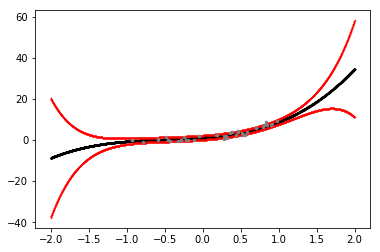

In [38]:
draw_incomes(test, 50)

## Predict result

Predict result


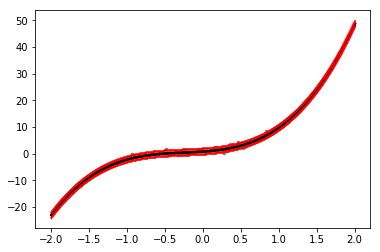

In [42]:
draw_result(test)